# Investigating oversampling methods on binary classification algorithms for "Default of Credit Card clients" dataset

<p>The aim of this project is to investigate the performance of various classification algorithms on imbalanced datasets using resampling methods. The study will explore the effectiveness of resampling methods improving classification performance and preventing bias towards the majority class.</p>

### Import necessary libraries

In [1]:
import pandas as pd   
import numpy as np   
import seaborn as sns  
import matplotlib.pyplot as plt  
from matplotlib import pyplot  
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler 

from numpy import where
from collections import Counter
from termcolor import colored

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

print(colored("\nAbove Libraries were imported successfully...", color = "green", attrs = ["bold", "dark"]))



Above Libraries were imported successfully...


In [2]:
!pip install imblearn
!pip install -U imbalanced-learn
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
print(colored("\nAbove Libraries were imported successfully...", color = "green", attrs = ["bold", "dark"]))


Above Libraries were imported successfully...


In [3]:
pd.set_option('display.max_columns', 30)

In [4]:
import os
os.chdir(r"C:\Users\sagi2\OneDrive - Northumbria University - Production Azure AD\Dissertation\Code\dataset")

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

### Read the dataset

In [6]:
df = pd.read_excel("default-of-credit-card-clients.xls")
print("There are " + str(len(df)) + " observations in the credit card default dataset.")
print("There are " + str(len(df.columns)) + " variables in the dataset.")
df.head()

There are 30001 observations in the credit card default dataset.
There are 25 variables in the dataset.


,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [7]:
# df = pd.read_excel("/content/drive/My Drive/Colab Notebooks/default-of-credit-card-clients.xls")
# print("There are " + str(len(df)) + " observations in the credit card fraud dataset.")
# print("There are " + str(len(df.columns)) + " variables in the dataset.")
# df.head()

### Clean the data

In [8]:
#Make first row as header
df = df.rename(columns=df.iloc[0]).drop(df.index[0]).reset_index(drop=True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
df = df.drop(['ID'], axis = 1)
df.head(n = 7).style.set_properties(**{"background-color": "#20B2AB", "font-size" : "15px",
                                         "color": "#ffffff", "border": "1.5px solid black"})

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0


In [10]:
df.rename(columns = {"LIMIT_BAL" : "limit_bal", "SEX" : "sex", "EDUCATION" : "education", "MARRIAGE" : "marriage","AGE":"age",
                     "PAY_0":"pay_0", "PAY_2":"pay_2", "PAY_3":"pay_3", "PAY_4":"pay_4","PAY_5":"pay_5", "PAY_6":"pay_6","BILL_AMT1":"bill_amt_1", 
                     "BILL_AMT2":"bill_amt_2","BILL_AMT3":"bill_amt_3", "BILL_AMT4":"bill_amt_4", "BILL_AMT5":"bill_amt_5",
                     "BILL_AMT6":"bill_amt_6", "PAY_AMT1":"pay_amt_1", "PAY_AMT2":"pay_amt_2", "PAY_AMT3":"pay_amt_3", "PAY_AMT4":"pay_amt_4", 
                     "PAY_AMT5":"pay_amt_5", "PAY_AMT6":"pay_amt_6", "default payment next month":"default"
                     },
          inplace = True)

print(colored("\nTHE NAMES OF COLUMNS WERE SUCCESFULLY CHANGED...", color = "green", attrs = ["bold", "dark"]))


THE NAMES OF COLUMNS WERE SUCCESFULLY CHANGED...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   limit_bal   30000 non-null  object
 1   sex         30000 non-null  object
 2   education   30000 non-null  object
 3   marriage    30000 non-null  object
 4   age         30000 non-null  object
 5   pay_0       30000 non-null  object
 6   pay_2       30000 non-null  object
 7   pay_3       30000 non-null  object
 8   pay_4       30000 non-null  object
 9   pay_5       30000 non-null  object
 10  pay_6       30000 non-null  object
 11  bill_amt_1  30000 non-null  object
 12  bill_amt_2  30000 non-null  object
 13  bill_amt_3  30000 non-null  object
 14  bill_amt_4  30000 non-null  object
 15  bill_amt_5  30000 non-null  object
 16  bill_amt_6  30000 non-null  object
 17  pay_amt_1   30000 non-null  object
 18  pay_amt_2   30000 non-null  object
 19  pay_amt_3   30000 non-null  object
 20  pay_am

In [12]:
# Check for duplicate rows.
print(f"There are {df.duplicated().sum()} duplicate rows in the data set.")

# Remove duplicate rows.
df=df.drop_duplicates()
print("The duplicate rows were removed.")

There are 35 duplicate rows in the data set.
The duplicate rows were removed.


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29965 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   limit_bal   29965 non-null  object
 1   sex         29965 non-null  object
 2   education   29965 non-null  object
 3   marriage    29965 non-null  object
 4   age         29965 non-null  object
 5   pay_0       29965 non-null  object
 6   pay_2       29965 non-null  object
 7   pay_3       29965 non-null  object
 8   pay_4       29965 non-null  object
 9   pay_5       29965 non-null  object
 10  pay_6       29965 non-null  object
 11  bill_amt_1  29965 non-null  object
 12  bill_amt_2  29965 non-null  object
 13  bill_amt_3  29965 non-null  object
 14  bill_amt_4  29965 non-null  object
 15  bill_amt_5  29965 non-null  object
 16  bill_amt_6  29965 non-null  object
 17  pay_amt_1   29965 non-null  object
 18  pay_amt_2   29965 non-null  object
 19  pay_amt_3   29965 non-null  object
 20  pay_am

In [14]:
df.shape

(29965, 24)

In [15]:
print("There are total {} null values in the dataset".format(df.isnull().sum().sum()))

There are total 0 null values in the dataset


In [16]:
df['default'].value_counts(normalize = True)


0    0.778742
1    0.221258
Name: default, dtype: float64

In [17]:
df.describe().style.set_properties(**{"background-color": "#20B2AA", "font-size" : "15px",
                                        "color": "#ffffff", "border": "1.5px solid black"})

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default
count,29965,29965,29965,29965,29965,29965,29965,29965,29965,29965,29965,29965,29965,29965,29965,29965,29965,29965,29965,29965,29965,29965,29965,29965
unique,81,2,7,4,56,11,11,11,11,10,10,22723,22346,22026,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,50000,2,2,2,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
freq,3363,18091,14019,15945,1602,14737,15730,15764,16455,16947,16286,1978,2476,2840,3165,3476,3990,5218,5365,5937,6377,6672,7142,23335


# Data Visualization

In [18]:
df.dtypes

limit_bal     object
sex           object
education     object
marriage      object
age           object
pay_0         object
pay_2         object
pay_3         object
pay_4         object
pay_5         object
pay_6         object
bill_amt_1    object
bill_amt_2    object
bill_amt_3    object
bill_amt_4    object
bill_amt_5    object
bill_amt_6    object
pay_amt_1     object
pay_amt_2     object
pay_amt_3     object
pay_amt_4     object
pay_amt_5     object
pay_amt_6     object
default       object
dtype: object

In [19]:
df = df.astype({'limit_bal': 'float64', 'sex': 'float64', 'education': 'float64', 'marriage': 'float64',
                'age': 'float64', 'pay_0': 'float64', 'pay_2': 'float64', 'pay_3': 'float64', 'pay_4': 'float64',
                'pay_5': 'float64', 'pay_6': 'float64', 'bill_amt_1': 'float64', 'bill_amt_2': 'float64',
                'bill_amt_3': 'float64', 'bill_amt_4': 'float64', 'bill_amt_5': 'float64', 'bill_amt_6': 'float64',
                'pay_amt_1': 'float64', 'pay_amt_2': 'float64', 'pay_amt_3': 'float64', 'pay_amt_4': 'float64',
                'pay_amt_5': 'float64', 'pay_amt_6': 'float64', 'default': 'float64'})


### Correlation matrix

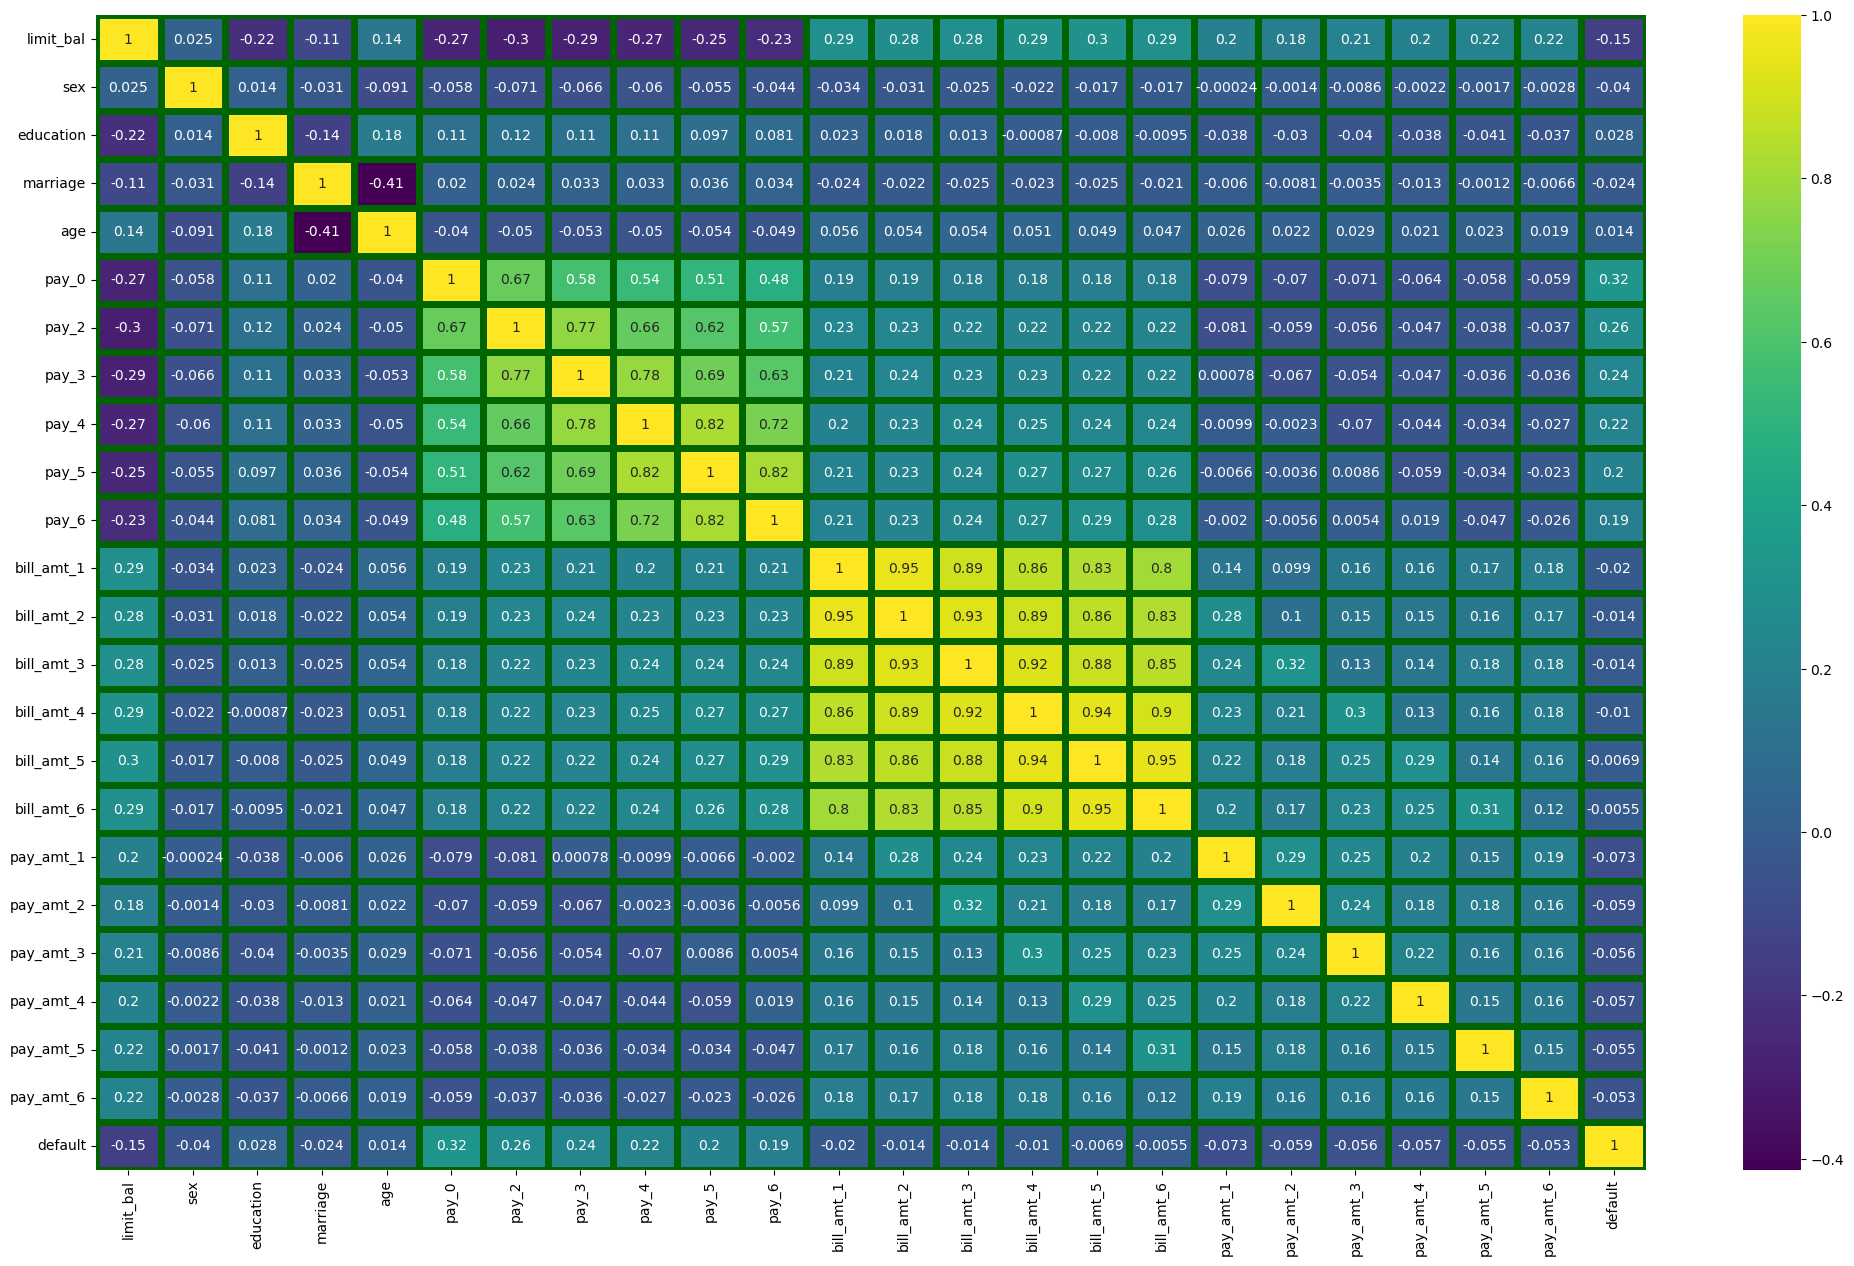

In [20]:
plt.figure(figsize = [25, 15], clear = True, facecolor = "white")
sns.heatmap(df.corr(), annot = True, square = False, linewidths = 5,
            linecolor = "#006400", cmap = "viridis");

## Pie chart

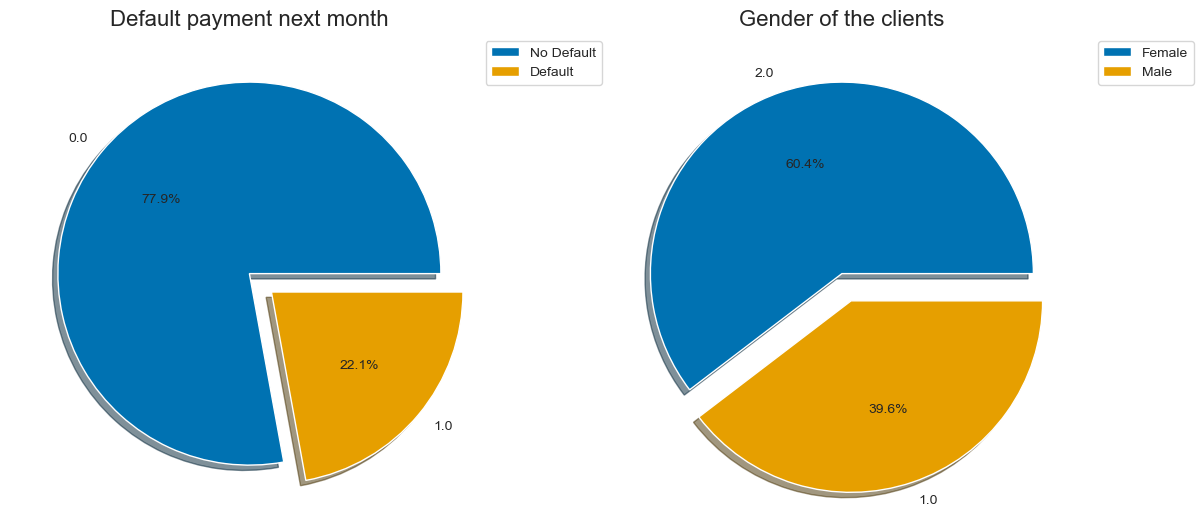

In [21]:
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot 1: Default payment next month
df["default"].value_counts().plot(kind="pie", explode=[0, 0.15], autopct='%1.1f%%', shadow=True, colors=["#0072B2", "#E69F00"], ax=axes[0])
axes[0].set_title("Default payment next month", fontsize=16)
axes[0].set_ylabel("") # Remove default label from pie chart
axes[0].legend(["No Default", "Default"], loc="upper right", bbox_to_anchor=(1.25, 1)) # Add legend outside of the plot

# Plot 2: Gender of the clients
df["sex"].value_counts().plot(kind="pie", explode=[0, 0.15], autopct='%1.1f%%', shadow=True, colors=["#0072B2", "#E69F00"], ax=axes[1])
axes[1].set_title("Gender of the clients", fontsize=16)
axes[1].set_ylabel("") # Remove default label from pie chart
axes[1].legend(["Female", "Male"], loc="upper right", bbox_to_anchor=(1.25, 1)) # Add legend outside of the plot

plt.tight_layout() # Adjust plot layout to avoid overlapping
plt.show() # Display the plots


## Bar plot

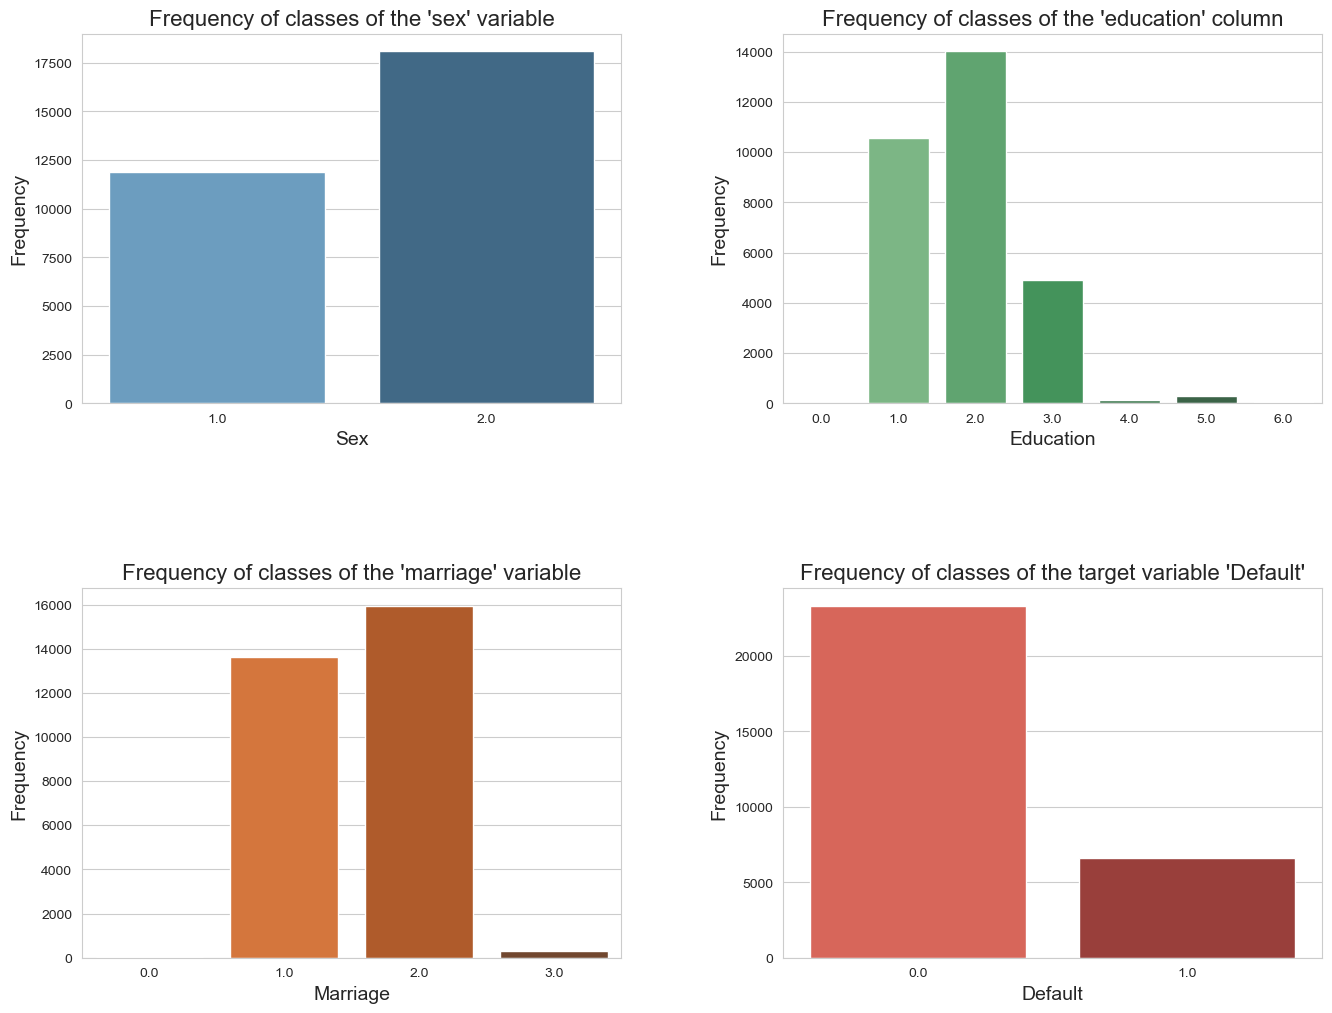

In [22]:
# Set the default style for the plots
sns.set_style("whitegrid")

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Set the font size for the plot
sns.set(font_scale=1.2)

# Plot 1: Frequency of classes of the 'sex' variable
sns.countplot(ax=axes[0],
              x="sex",
              data=df,
              palette="Blues_d")
axes[0].set_title("Frequency of classes of the 'sex' variable", fontsize=16)
axes[0].set_xlabel("Sex", fontsize=14)
axes[0].set_ylabel("Frequency", fontsize=14)

# Plot 2: Frequency of classes of the 'education' column
sns.countplot(ax=axes[1],
              x="education",
              data=df,
              palette="Greens_d")
axes[1].set_title("Frequency of classes of the 'education' column", fontsize=16)
axes[1].set_xlabel("Education", fontsize=14)
axes[1].set_ylabel("Frequency", fontsize=14)

# Plot 3: Frequency of classes of the 'marriage' variable
sns.countplot(ax=axes[2],
              x="marriage",
              data=df,
              palette="Oranges_d")
axes[2].set_title("Frequency of classes of the 'marriage' variable", fontsize=16)
axes[2].set_xlabel("Marriage", fontsize=14)
axes[2].set_ylabel("Frequency", fontsize=14)

# Plot 4: Frequency of classes of the target variable 'Default'
sns.countplot(ax=axes[3],
              x="default",
              data=df,
              palette="Reds_d")
axes[3].set_title("Frequency of classes of the target variable 'Default'", fontsize=16)
axes[3].set_xlabel("Default", fontsize=14)
axes[3].set_ylabel("Frequency", fontsize=14)

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.show() # Display the plot


## Box plot

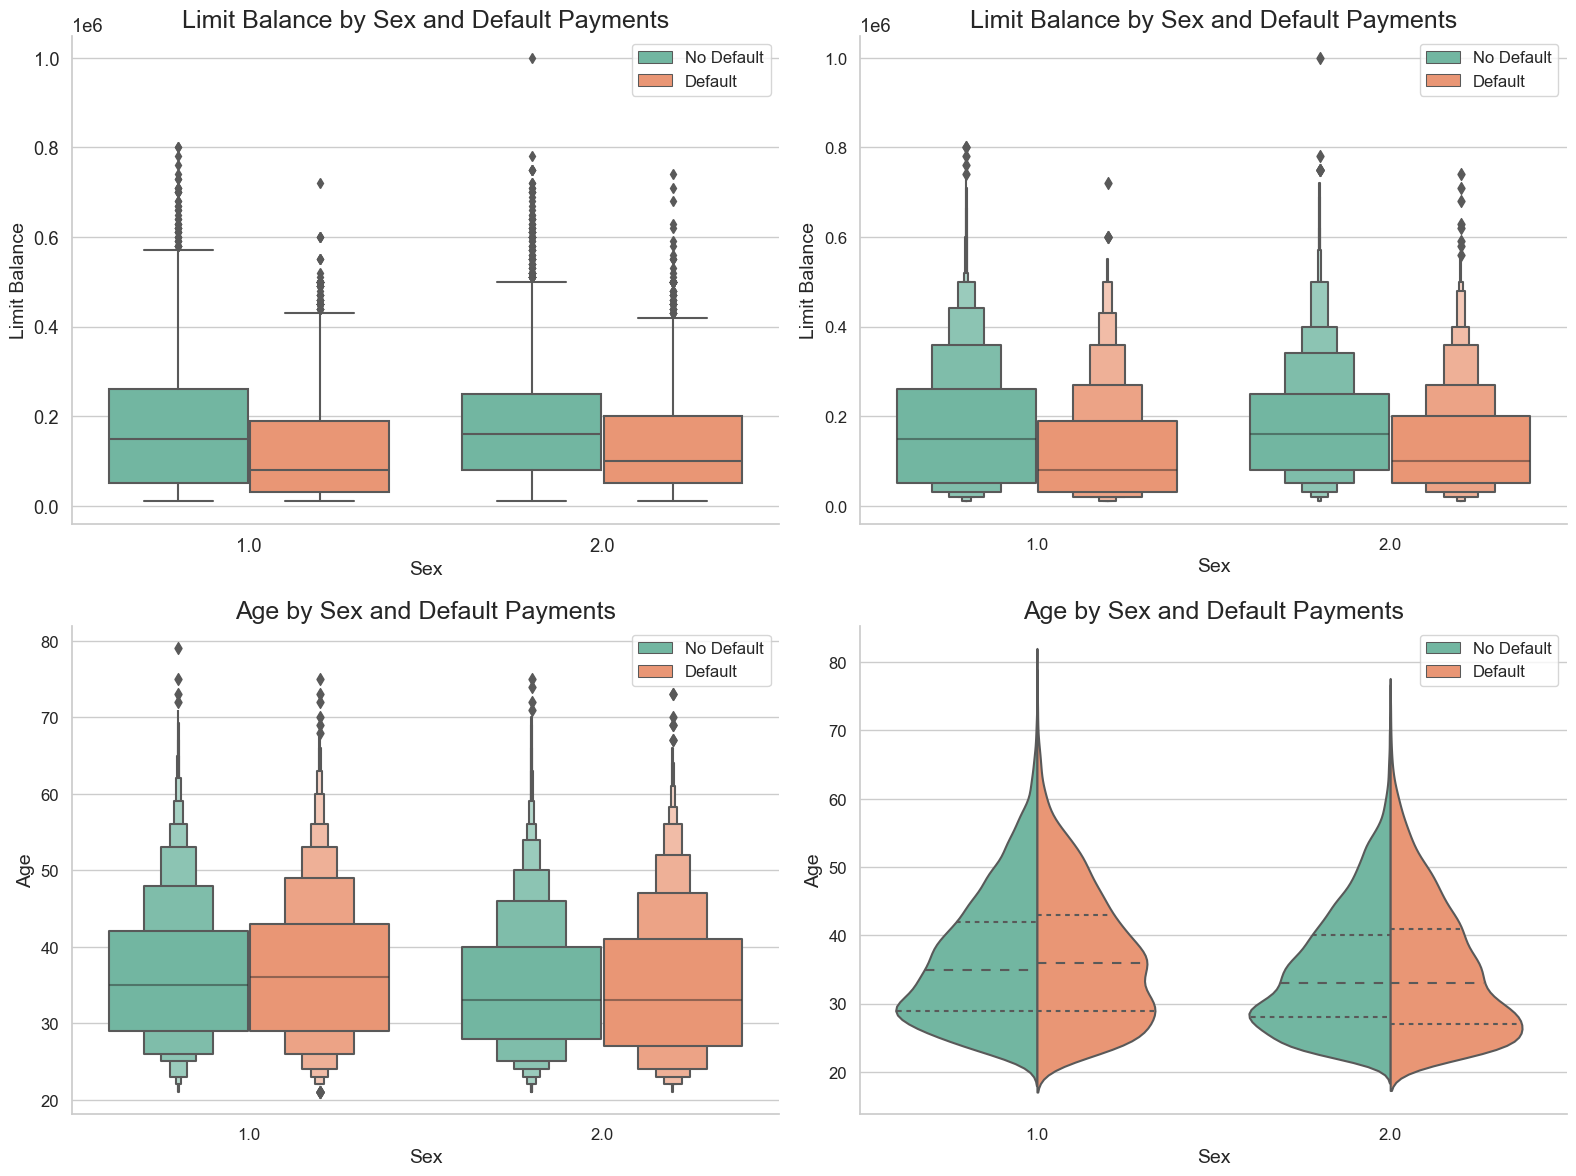

In [23]:
sns.set_style("whitegrid")

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

sns.boxplot(ax=axs[0, 0], x="sex", y="limit_bal", hue="default", data=df, palette="Set2")
axs[0, 0].set_title("Limit Balance by Sex and Default Payments", fontsize=18)
axs[0, 0].set_xlabel("Sex", fontsize=14)
axs[0, 0].set_ylabel("Limit Balance", fontsize=14)
handles, labels = axs[0, 0].get_legend_handles_labels()
labels = ['No Default', 'Default']
handles = [handles[0], handles[-1]]
axs[0, 0].legend(handles, labels, fontsize=12)

sns.boxenplot(ax=axs[0, 1], x="sex", y="limit_bal", hue="default", data=df, palette="Set2")
axs[0, 1].set_title("Limit Balance by Sex and Default Payments", fontsize=18)
axs[0, 1].set_xlabel("Sex", fontsize=14)
axs[0, 1].set_ylabel("Limit Balance", fontsize=14)
axs[0, 1].tick_params(axis='both', labelsize=12)
handles, labels = axs[0, 1].get_legend_handles_labels()
labels = ['No Default', 'Default']
handles = [handles[0], handles[-1]]
axs[0, 1].legend(handles, labels, fontsize=12)

sns.boxenplot(ax=axs[1, 0], x="sex", y="age", hue="default", data=df, palette="Set2")
axs[1, 0].set_title("Age by Sex and Default Payments", fontsize=18)
axs[1, 0].set_xlabel("Sex", fontsize=14)
axs[1, 0].set_ylabel("Age", fontsize=14)
axs[1, 0].tick_params(axis='both', labelsize=12)
handles, labels = axs[1, 0].get_legend_handles_labels()
labels = ['No Default', 'Default']
handles = [handles[0], handles[-1]]
axs[1, 0].legend(handles, labels, fontsize=12)

sns.violinplot(ax=axs[1, 1], x="sex", y="age", hue="default", data=df, palette="Set2", split=True, inner="quartile")
axs[1, 1].set_title("Age by Sex and Default Payments", fontsize=18)
axs[1, 1].set_xlabel("Sex", fontsize=14)
axs[1, 1].set_ylabel("Age", fontsize=14)
axs[1, 1].tick_params(axis='both', labelsize=12)
handles, labels = axs[1, 1].get_legend_handles_labels()
labels = ['No Default', 'Default']
handles = [handles[0], handles[-1]]
axs[1, 1].legend(handles, labels, fontsize=12)

sns.despine()

plt.tight_layout()
plt.show()


## Pair plot

In [24]:
# sns.pairplot(df, diag_kind = "hist", height = 4, aspect = 1, corner = True);

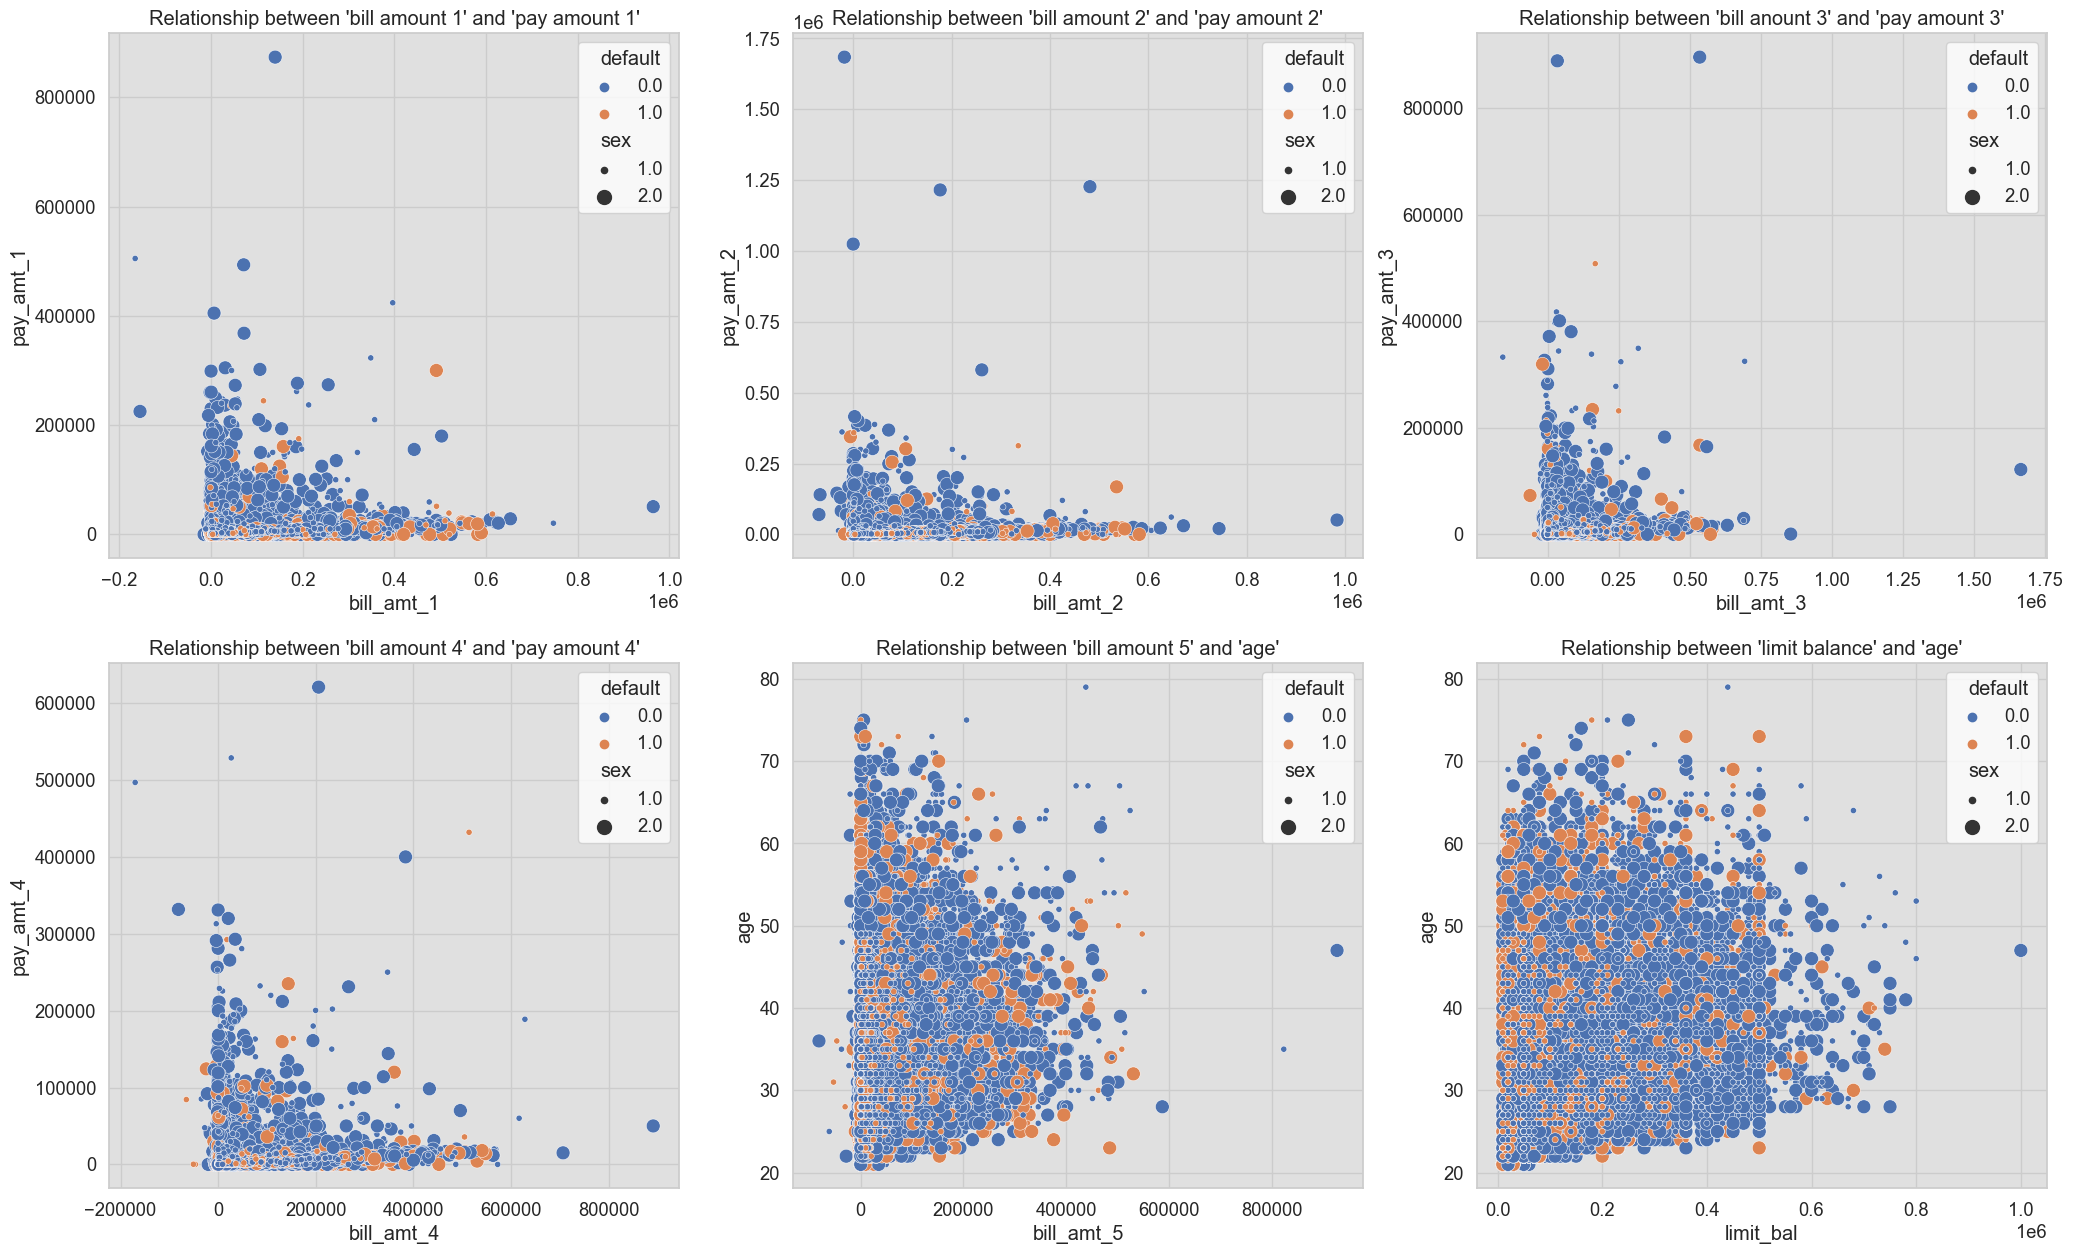

In [25]:
fig, axes = plt.subplots(2, 3, figsize = (25, 15))
axes = axes.flatten()

sns.scatterplot(ax = axes[0], x = "bill_amt_1", y = "pay_amt_1", hue = "default", size = "sex", sizes = (20, 100), legend="full",
                data = df).set(title = "Relationship between 'bill amount 1' and 'pay amount 1'");
axes[0].set_facecolor("#E0E0E0")

sns.scatterplot(ax = axes[1], x = "bill_amt_2", y = "pay_amt_2", hue = "default", size = "sex", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'bill amount 2' and 'pay amount 2'");
axes[1].set_facecolor("#E0E0E0")

sns.scatterplot(ax = axes[2], x = "bill_amt_3", y = "pay_amt_3", hue = "default", size = "sex", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'bill anount 3' and 'pay amount 3'");
axes[2].set_facecolor("#E0E0E0")

sns.scatterplot(ax = axes[3], x = "bill_amt_4", y = "pay_amt_4", hue = "default", size = "sex", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'bill amount 4' and 'pay amount 4'");
axes[3].set_facecolor("#E0E0E0")

sns.scatterplot(ax = axes[4], x = "bill_amt_5", y = "age", hue = "default", size = "sex", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'bill amount 5' and 'age'");
axes[4].set_facecolor("#E0E0E0")

sns.scatterplot(ax = axes[5], x = "limit_bal", y = "age", hue = "default", size = "sex", sizes=(20, 100), legend="full",
                data = df).set(title = "Relationship between 'limit balance' and 'age'");
axes[5].set_facecolor("#E0E0E0")

## Dist plot

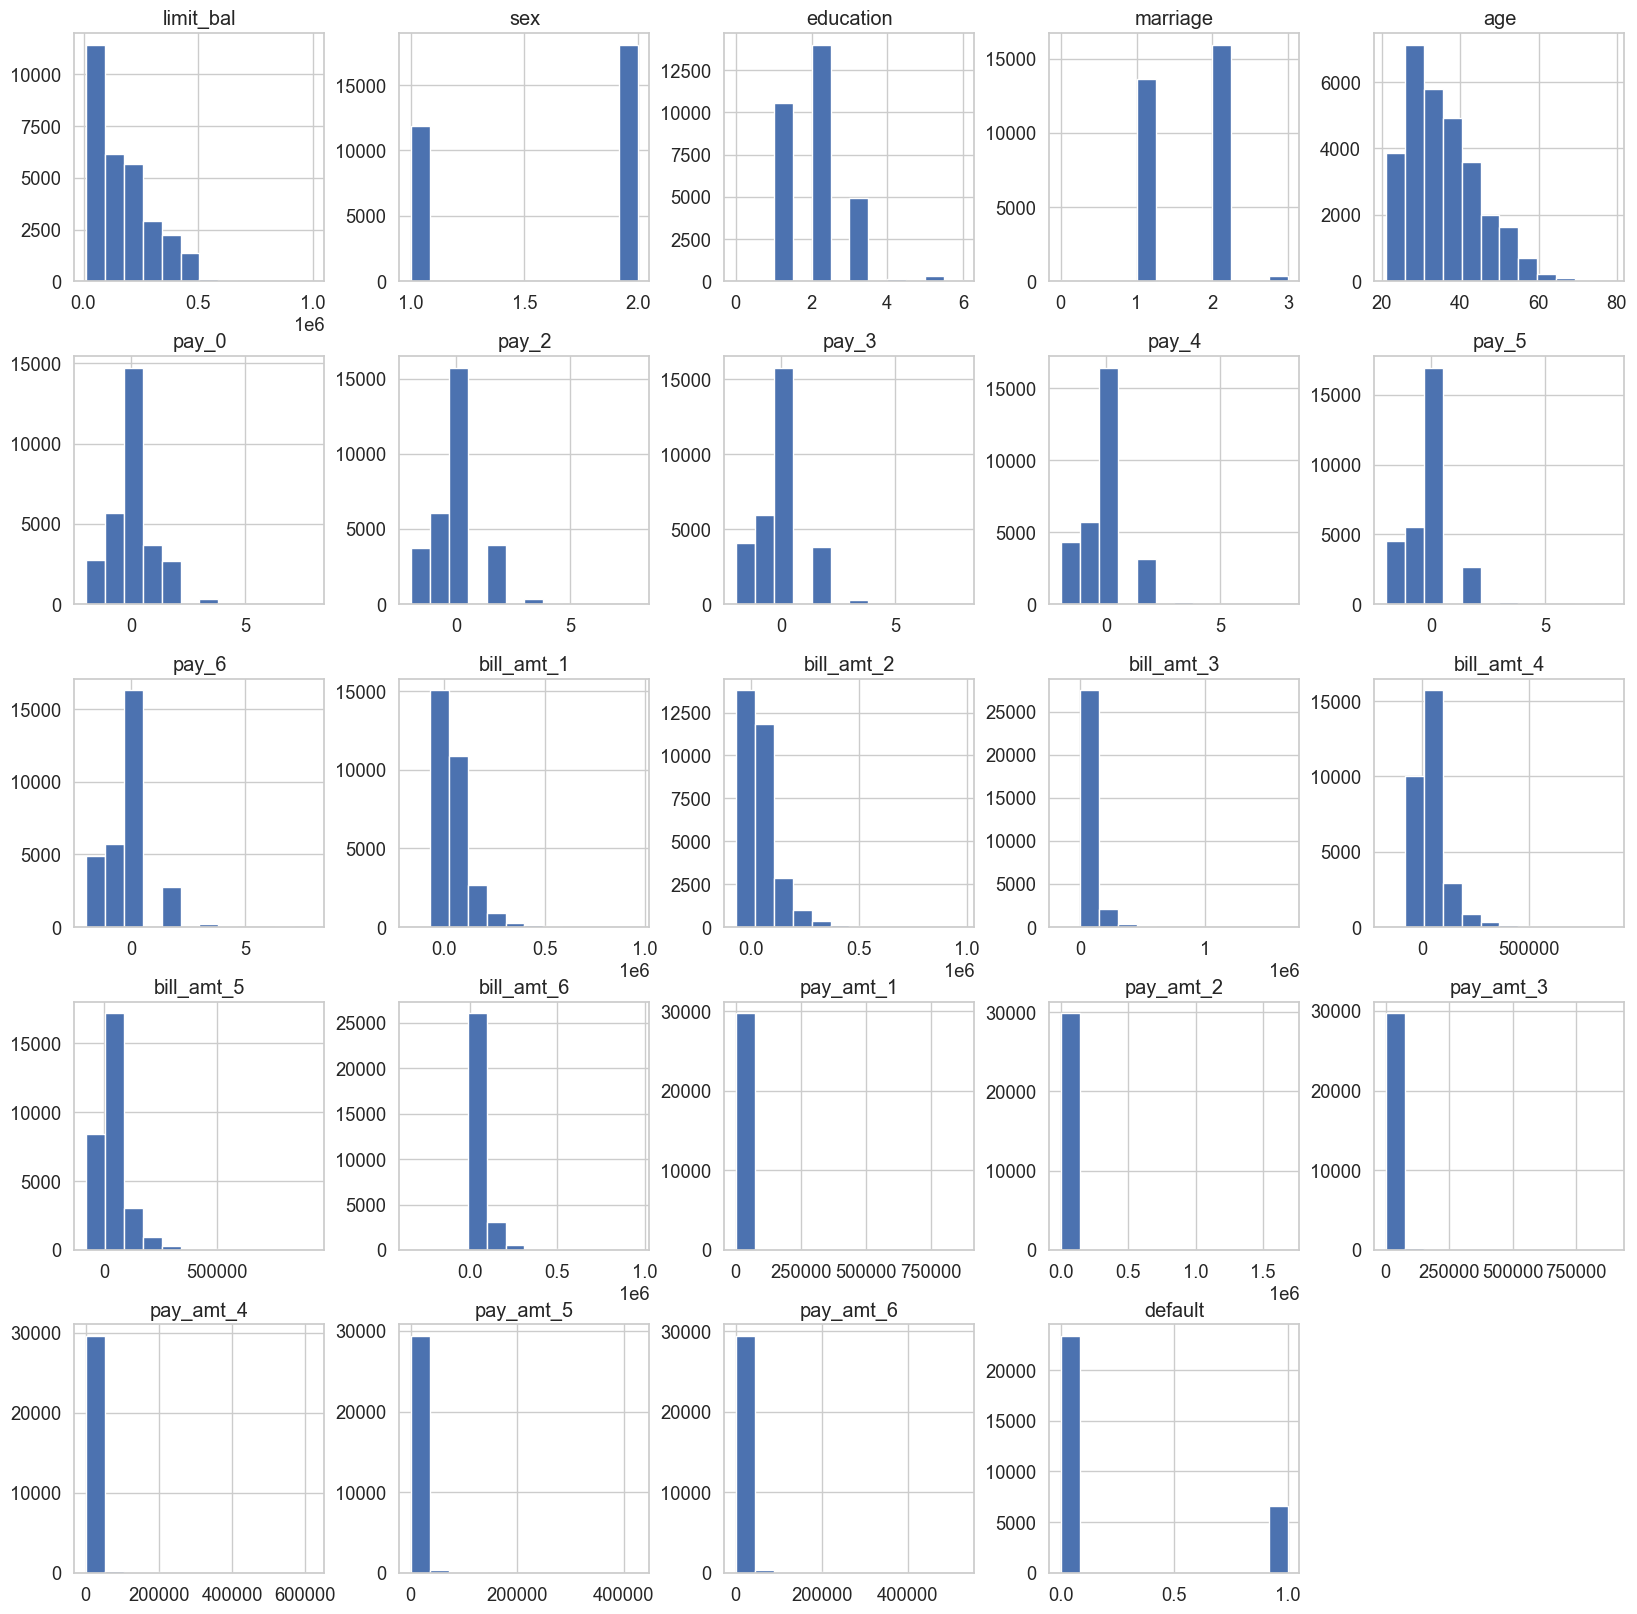

In [26]:
df.hist(figsize = (20, 20), bins = 12, legend = False, grid = True);

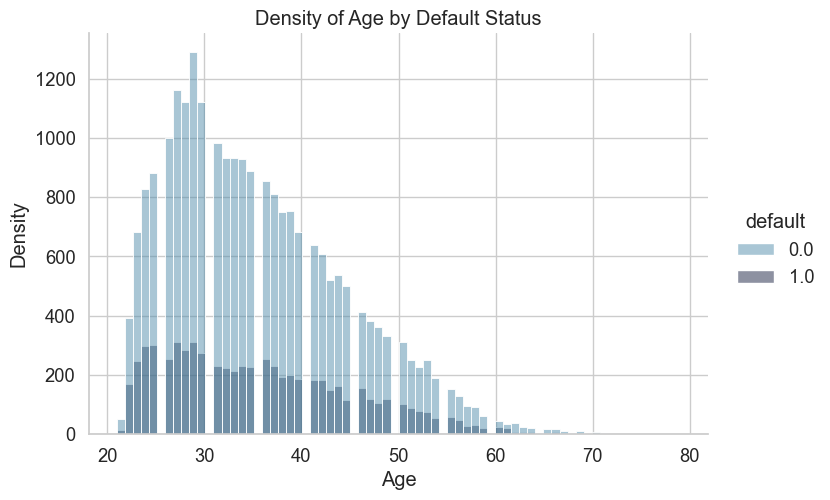

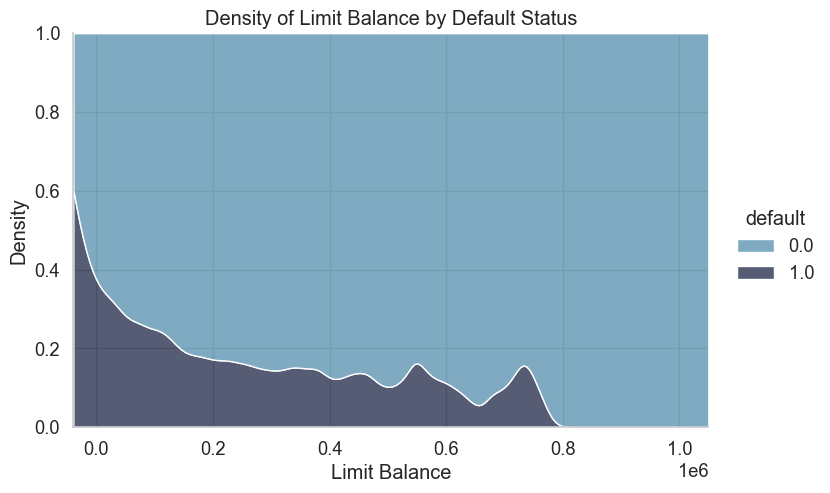

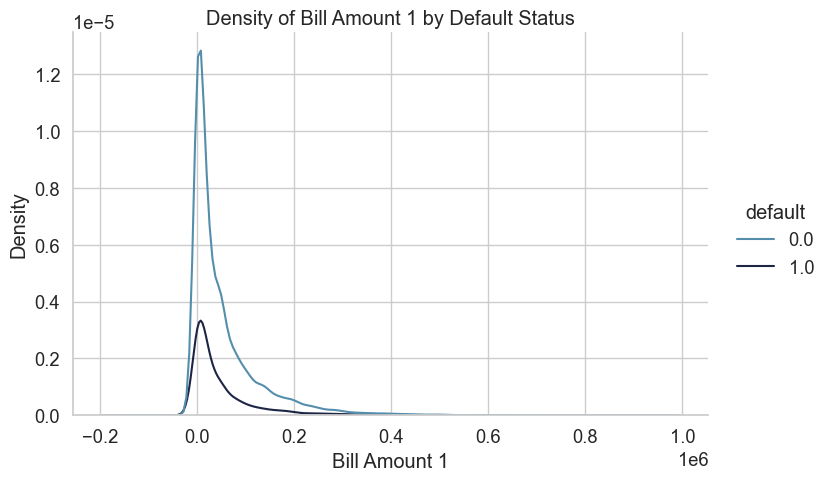

In [27]:
sns.displot(data=df, x="age", hue="default", kind="hist", height=5, aspect=1.5, 
            palette="ch:rot=-.25,hue=1,light=.50").set(title="Density of Age by Default Status", 
                                                      xlabel="Age", ylabel="Density")

sns.displot(data=df, x="limit_bal", hue="default", kind="kde", height=5, aspect=1.5, multiple="fill", 
            palette="ch:rot=-.25,hue=1,light=.50").set(title="Density of Limit Balance by Default Status", 
                                                      xlabel="Limit Balance", ylabel="Density")

sns.displot(data=df, x="bill_amt_1", hue="default", kind="kde", height=5, aspect=1.5, 
            palette="ch:rot=-.25,hue=1,light=.50").set(title="Density of Bill Amount 1 by Default Status", 
                                                      xlabel="Bill Amount 1", ylabel="Density")


## Reg plot

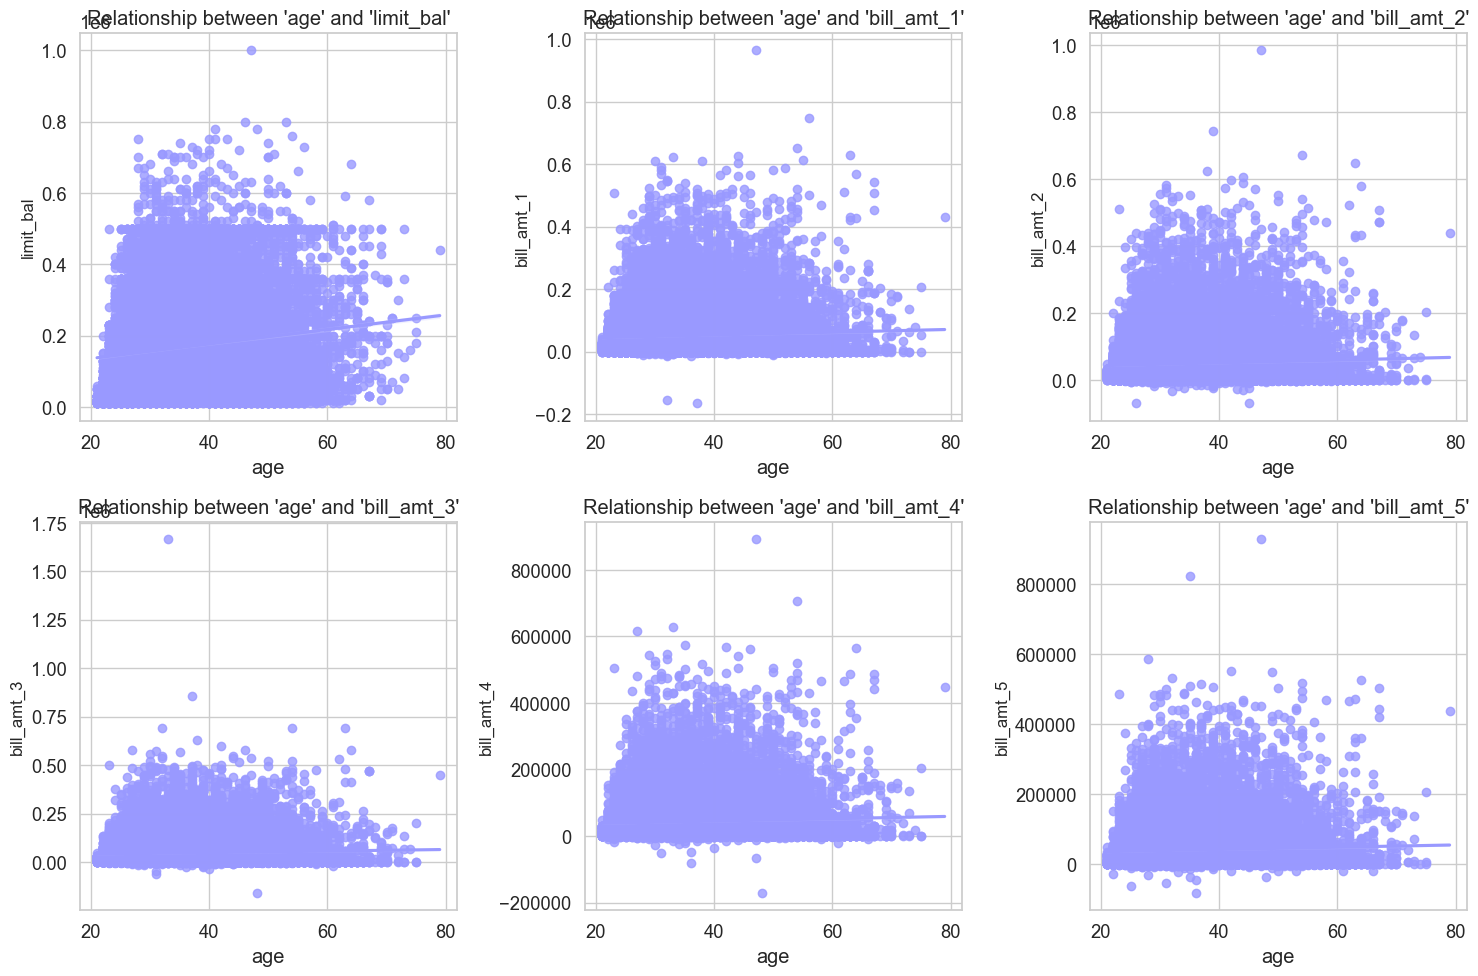

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

columns = ["limit_bal", "bill_amt_1", "bill_amt_2", "bill_amt_3", "bill_amt_4", "bill_amt_5"]

for i, col in enumerate(columns):
    sns.regplot(ax=axes[i], x="age", y=col, data=df, color="#9999FF")
    axes[i].set_title(f"Relationship between 'age' and '{col}'")
    axes[i].set_ylabel(col, fontsize=12)

plt.tight_layout()


## View Dataset again

In [29]:
# Define a function to format the DataFrame's style
def highlight_style(x):
    return 'background-color: #A9CCE3; color: #2C3E50; font-size: 15px; border: 1.5px solid black'

# Apply the formatting to the DataFrame's head and display it
df.head(n=5).style.applymap(highlight_style)


,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default
0,20000.000000,2.000000,2.000000,1.000000,24.000000,2.000000,2.000000,-1.000000,-1.000000,-2.000000,-2.000000,3913.000000,3102.000000,689.000000,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,120000.000000,2.000000,2.000000,2.000000,26.000000,-1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,2682.000000,1725.000000,2682.000000,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1.000000
2,90000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29239.000000,14027.000000,13559.000000,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0.000000
3,50000.000000,2.000000,2.000000,1.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46990.000000,48233.000000,49291.000000,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0.000000
4,50000.000000,1.000000,2.000000,1.000000,57.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,8617.000000,5670.000000,35835.000000,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0.000000


## Encode categoric variabale

In [30]:
lbe = LabelEncoder()
lbe.fit_transform(df["sex"])
df["sex"] = lbe.fit_transform(df["sex"])

lbe.fit_transform(df["marriage"])
df["marriage"] = lbe.fit_transform(df["marriage"])

#lbe.fit_transform(df["oral"])
#df["oral"] = lbe.fit_transform(df["oral"])

## Select Dependent and independent variables

In [31]:
# independent variable (estimator)
X = df.drop("default", axis = 1)

# dependent variable (label)
y = df["default"]

## Split the dataset into train and test sets

In [32]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = True, random_state = 11)

## Stratified k fold

In [33]:
from sklearn.model_selection import StratifiedKFold

print("Original labels distribution:\n",df['default'].value_counts(normalize = True))
print("="*40)

# define the number of splits
n_splits = 5

# create a stratified k-fold object
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# initialize empty arrays to store the train and test indices
train_indices = []
test_indices = []

# perform the split and store the indices
for train_index, test_index in skf.split(X, y):
    train_indices.append(train_index)
    test_indices.append(test_index)

# convert the train and test indices to numpy arrays
train_indices = np.array(train_indices)
test_indices = np.array(test_indices)

# extract the corresponding X and y values for the train and test sets
X_train, y_train = X.iloc[train_indices[0]], y.iloc[train_indices[0]]
X_test, y_test = X.iloc[test_indices[0]], y.iloc[test_indices[0]]

# check if the train and test labels are similarly distributed
print("Train labels distribution:\n", y_train.value_counts(normalize=True))
print("="*40)
print("Test labels distribution:\n", y_test.value_counts(normalize=True))


Original labels distribution:
 0.0    0.778742
1.0    0.221258
Name: default, dtype: float64
Train labels distribution:
 0.0    0.778742
1.0    0.221258
Name: default, dtype: float64
Test labels distribution:
 0.0    0.778742
1.0    0.221258
Name: default, dtype: float64


## Standardization process

Standardizing the features around the center and 0 with a standard deviation of 1 is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais. For example, a variable that ranges between 0 and 1000 will outweigh a variable that ranges between 0 and 1. Using these variables without standardization will give the variable with the larger range weight of 1000 in the analysis. Transforming the data to comparable scales can prevent this problem. Typical data standardization procedures equalize the range and/or data variability.

In [34]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scale, columns = X_train.columns)
X_test = pd.DataFrame(X_test_scale, columns = X_test.columns)

In [35]:
# Normalizing the data using MinMaxScaler
minmax_scaler = MinMaxScaler()
X_train_norm = minmax_scaler.fit_transform(X_train)
X_test_norm = minmax_scaler.transform(X_test)

X_train = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_test = pd.DataFrame(X_test_norm, columns = X_test.columns)

## oversampling methods

In [36]:
# !pip install --upgrade scikit-learn

In [37]:
def plot_confusion_matrix(ax, y_test, y_pred, title):
    rec = round(recall_score(y_test, y_pred), 2)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, linewidths=2, cbar=True, linecolor="white", fmt=".0f", ax=ax)
    ax.set_xlabel("predictions")
    ax.set_ylabel("original_y")
    ax.set_title("{0}\nRecall Score: {1}".format(title, rec), size=12)

def scoring(model, x_train, y_train, x_test, y_test, title):
    y_prob = model.predict_proba(x_test)[:, 1]
    y_pred = model.predict(x_test)

    cm = confusion_matrix(y_test, y_pred)
    all_scores = {"Accuracy score": accuracy_score(y_test, y_pred),
                  "Precision score": (cm[0, 0]) / (cm[0, 1] + cm[0, 0]),
                  "Recall score": recall_score(y_test, y_pred),
                  "F1 score": f1_score(y_test, y_pred),
                  "ROC AUC score": roc_auc_score(y_test, y_prob)}
    print(title)
    print(all_scores)
    return all_scores


def samplingStrategies():
    
    samplers = [("Random oversampling", RandomOverSampler), ("SMOTE", SMOTE), ("Borderline SMOTE", BorderlineSMOTE), ("Borderline SMOTE SVM", SVMSMOTE), ("ADASYN", ADASYN)]
    
    # Create subplots for each sampling strategy as well as non-resampled
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
    axes = axes.flatten()
    
    # Plot the non-resampled confusion matrix in the last subplot
    cm_non_resampled = scoring(classification_model, X_train, y_train, X_test, y_test, "Non-resampled")
    plot_confusion_matrix(axes[-1], y_test, classification_model.predict(X_test), "Non-resampled")
    
    # get performance metrics and confusion matrix for each sampling strategy
    cm_resampled_list = []  # create empty list to store each sampler_name and cm_resampled value
    for i, (sampler_name, sampler) in enumerate(samplers):
        X_resampled, y_resampled = sampler().fit_resample(X_train, y_train)
        classification_model.fit(X_resampled, y_resampled)
        cm_resampled = scoring(classification_model, X_resampled, y_resampled, X_test, y_test, sampler_name)
        plot_confusion_matrix(axes[i], y_test, classification_model.predict(X_test), sampler_name)
        cm_resampled_list.append((sampler_name, cm_resampled))  # append a tuple of sampler_name and cm_resampled to the list
    
    cm_resampled_list.append(("Non-resampled", cm_non_resampled))
    plt.tight_layout()
    plt.show()
    return cm_resampled_list


### Defining functions for ROC and PR curves

In [38]:
samplers = [("Random oversampling", RandomOverSampler), ("SMOTE", SMOTE), ("Borderline SMOTE", BorderlineSMOTE), ("Borderline SMOTE SVM", SVMSMOTE), ("ADASYN", ADASYN)]


In [39]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_ROC_curve(classification_model, X_train, y_train, X_test, y_test, samplers):
    # Create subplots for ROC curves
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
    
    # Plot ROC curve for non-resampled data
    y_prob = classification_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    axes.plot(fpr, tpr, label="Non-resampled (AUC = {:.4f})".format(roc_auc), lw=2)
    
    # Plot ROC curve for each sampling strategy
    for sampler_name, sampler in samplers:
        X_resampled, y_resampled = sampler().fit_resample(X_train, y_train)
        classification_model.fit(X_resampled, y_resampled)
        y_prob = classification_model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = roc_auc_score(y_test, y_prob)
        axes.plot(fpr, tpr, label="{} (AUC = {:.4f})".format(sampler_name, roc_auc), lw=2)
    
    axes.set_xlabel("False Positive Rate", fontsize=12)
    axes.set_ylabel("True Positive Rate", fontsize=12)
    axes.set_title("ROC Curves", fontsize=14)
    axes.legend(loc="lower right")
    
    plt.tight_layout()
    plt.show()



In [40]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

def plot_PR_curve(classification_model, X_train, y_train, X_test, y_test, samplers):
    # Create subplots for PR curves
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
    
    # Plot PR curve for non-resampled data
    y_prob = classification_model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = average_precision_score(y_test, y_prob)
    axes.plot(recall, precision, label="Non-resampled (AUC = {:.4f})".format(pr_auc), lw=2)
    
    # Plot PR curve for each sampling strategy
    for sampler_name, sampler in samplers:
        X_resampled, y_resampled = sampler().fit_resample(X_train, y_train)
        classification_model.fit(X_resampled, y_resampled)
        y_prob = classification_model.predict_proba(X_test)[:, 1]
        p, r, _ = precision_recall_curve(y_test, y_prob)
        pr_auc = average_precision_score(y_test, y_prob)
        axes.plot(r, p, label="{} (AUC = {:.4f})".format(sampler_name, pr_auc), lw=2)
    
    axes.set_xlabel("Recall", fontsize=12)
    axes.set_ylabel("Precision", fontsize=12)
    axes.set_title("PR Curves", fontsize=14)
    axes.legend(loc="lower left")
    
    plt.tight_layout()
    plt.show()


### Logistic regression

Best hyperparameters for Logistic Regression: {'C': 10, 'penalty': 'l2'}
Non-resampled
{'Accuracy score': 0.8084431837143334, 'Precision score': 0.9715020355688879, 'Recall score': 0.23453996983408748, 'F1 score': 0.35141242937853107, 'ROC AUC score': 0.7282259411981238}
Random oversampling
{'Accuracy score': 0.7043217086601035, 'Precision score': 0.7220912791943432, 'Recall score': 0.6417797888386124, 'F1 score': 0.48992515831894073, 'ROC AUC score': 0.7293709789960058}
SMOTE
{'Accuracy score': 0.6896379108960454, 'Precision score': 0.7006642382686951, 'Recall score': 0.6508295625942685, 'F1 score': 0.48131622978248745, 'ROC AUC score': 0.7305577074165032}
Borderline SMOTE
{'Accuracy score': 0.6355748373101953, 'Precision score': 0.6164559674308978, 'Recall score': 0.702865761689291, 'F1 score': 0.4604743083003952, 'ROC AUC score': 0.731020667237408}
Borderline SMOTE SVM
{'Accuracy score': 0.779909894877357, 'Precision score': 0.8534390400685665, 'Recall score': 0.5211161387631976, 'F

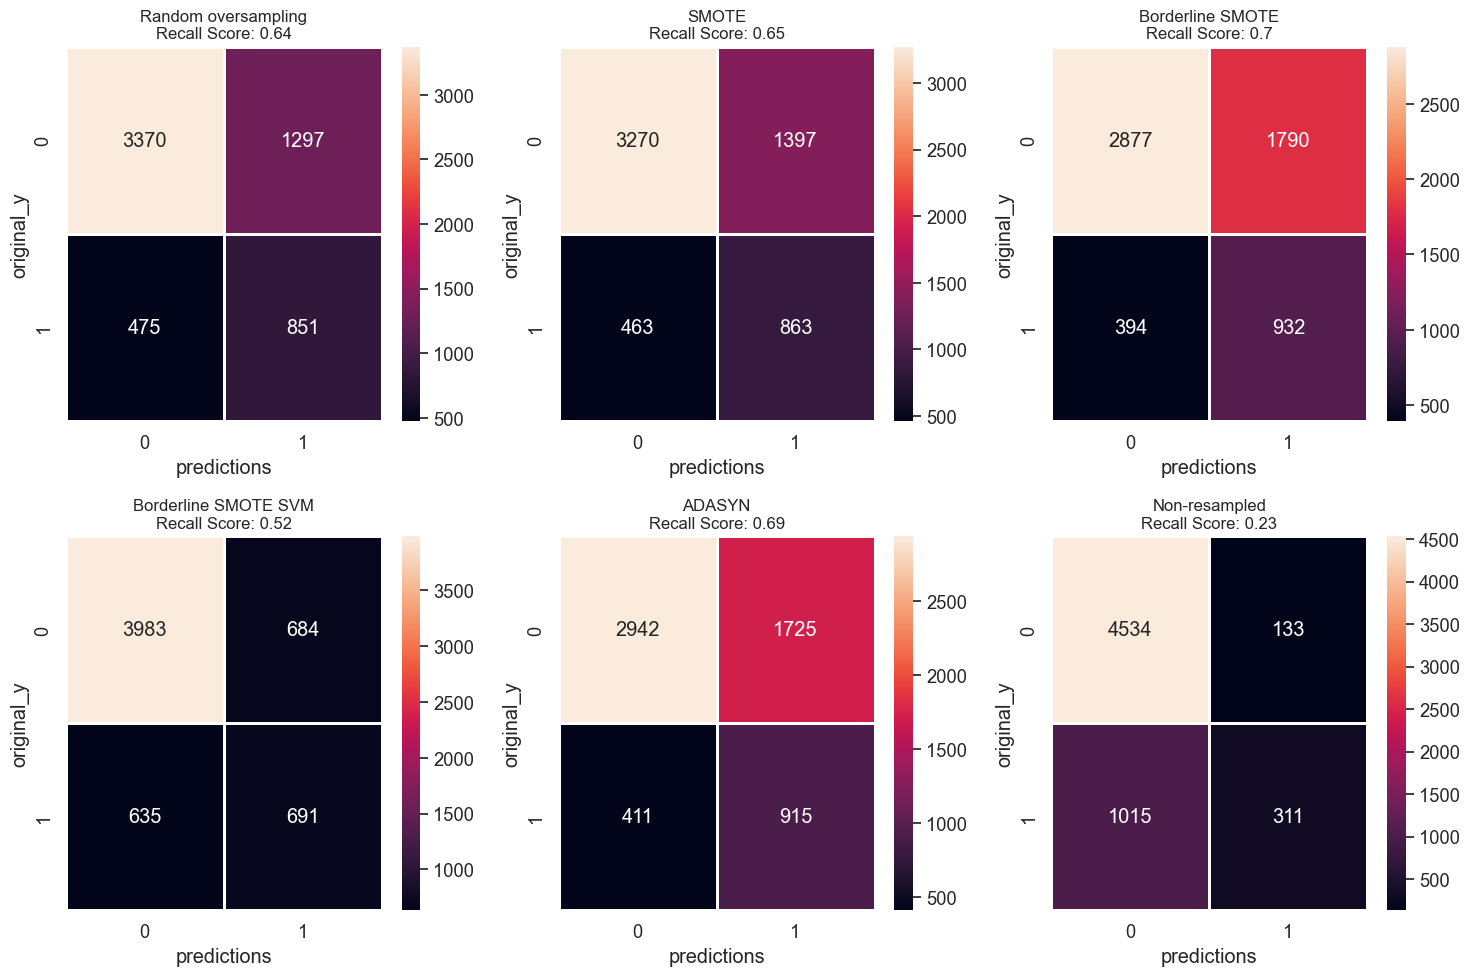

Elapsed time for Logistic regression with all oversampling methods: 21.10 seconds


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import time

# Define hyperparameters to search
log_reg_params = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 1, 10, 100]
}

# Create logistic regression model
lr_model = LogisticRegression()

# Create grid search object
lr_grid = GridSearchCV(estimator=lr_model, param_grid=log_reg_params, cv=3, n_jobs=-1)

# start calculting the time
start_time = time.time()

# Fit grid search object to the data
lr_grid.fit(X_train, y_train)

# Print best hyperparameters
print("Best hyperparameters for Logistic Regression:", lr_grid.best_params_)

# Fit model with best hyperparameters to training data
classification_model = lr_grid.best_estimator_
classification_model.fit(X_train, y_train)
logistic_scores = samplingStrategies()
end_time = time.time()
log_reg_elapsed_time = end_time - start_time
print("Elapsed time for Logistic regression with all oversampling methods: {:.2f} seconds".format(end_time - start_time))

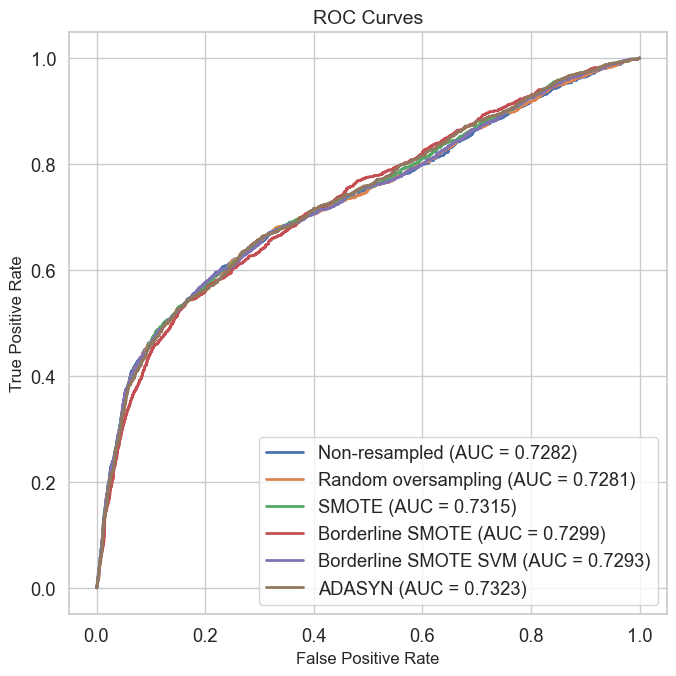

In [42]:
classification_model = lr_grid.best_estimator_
classification_model.fit(X_train, y_train)
plot_ROC_curve(classification_model, X_train, y_train, X_test, y_test, samplers)


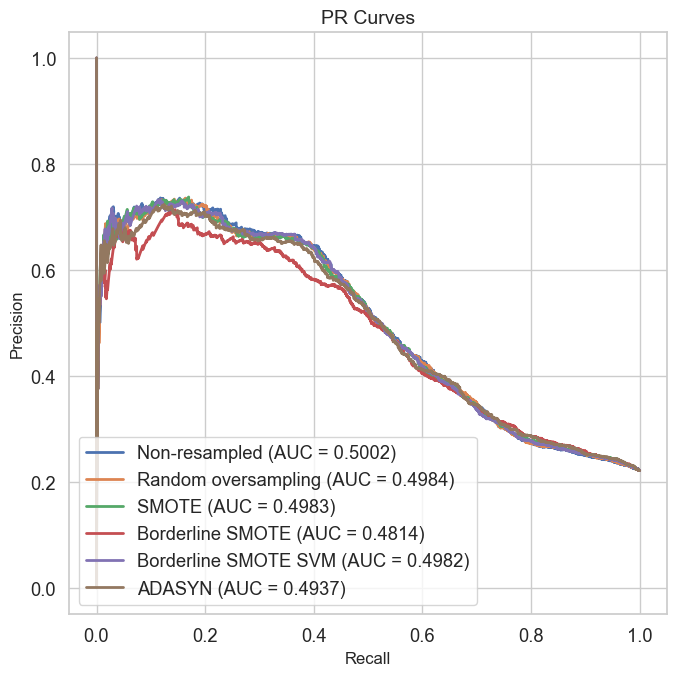

In [43]:
classification_model = lr_grid.best_estimator_
classification_model.fit(X_train, y_train)
plot_PR_curve(classification_model, X_train, y_train, X_test, y_test, samplers)

## KNN

Best hyperparameters for K-Nearest Neighbors: {'metric': 'manhattan', 'n_neighbors': 33, 'weights': 'uniform'}
Non-resampled
{'Accuracy score': 0.809444351743701, 'Precision score': 0.959074351832012, 'Recall score': 0.2828054298642534, 'F1 score': 0.39640591966173366, 'ROC AUC score': 0.7566395548346417}
Random oversampling
{'Accuracy score': 0.7186717837477057, 'Precision score': 0.7377330190700664, 'Recall score': 0.6515837104072398, 'F1 score': 0.5061511423550087, 'ROC AUC score': 0.7524177329285787}
SMOTE
{'Accuracy score': 0.7114967462039046, 'Precision score': 0.7293764731090636, 'Recall score': 0.6485671191553545, 'F1 score': 0.49869527399246155, 'ROC AUC score': 0.743879073278864}
Borderline SMOTE
{'Accuracy score': 0.6629400967795762, 'Precision score': 0.654381829869295, 'Recall score': 0.6930618401206636, 'F1 score': 0.4764126490409538, 'ROC AUC score': 0.7268544328281659}
Borderline SMOTE SVM
{'Accuracy score': 0.7642249290839312, 'Precision score': 0.8221555603171202, 'Re

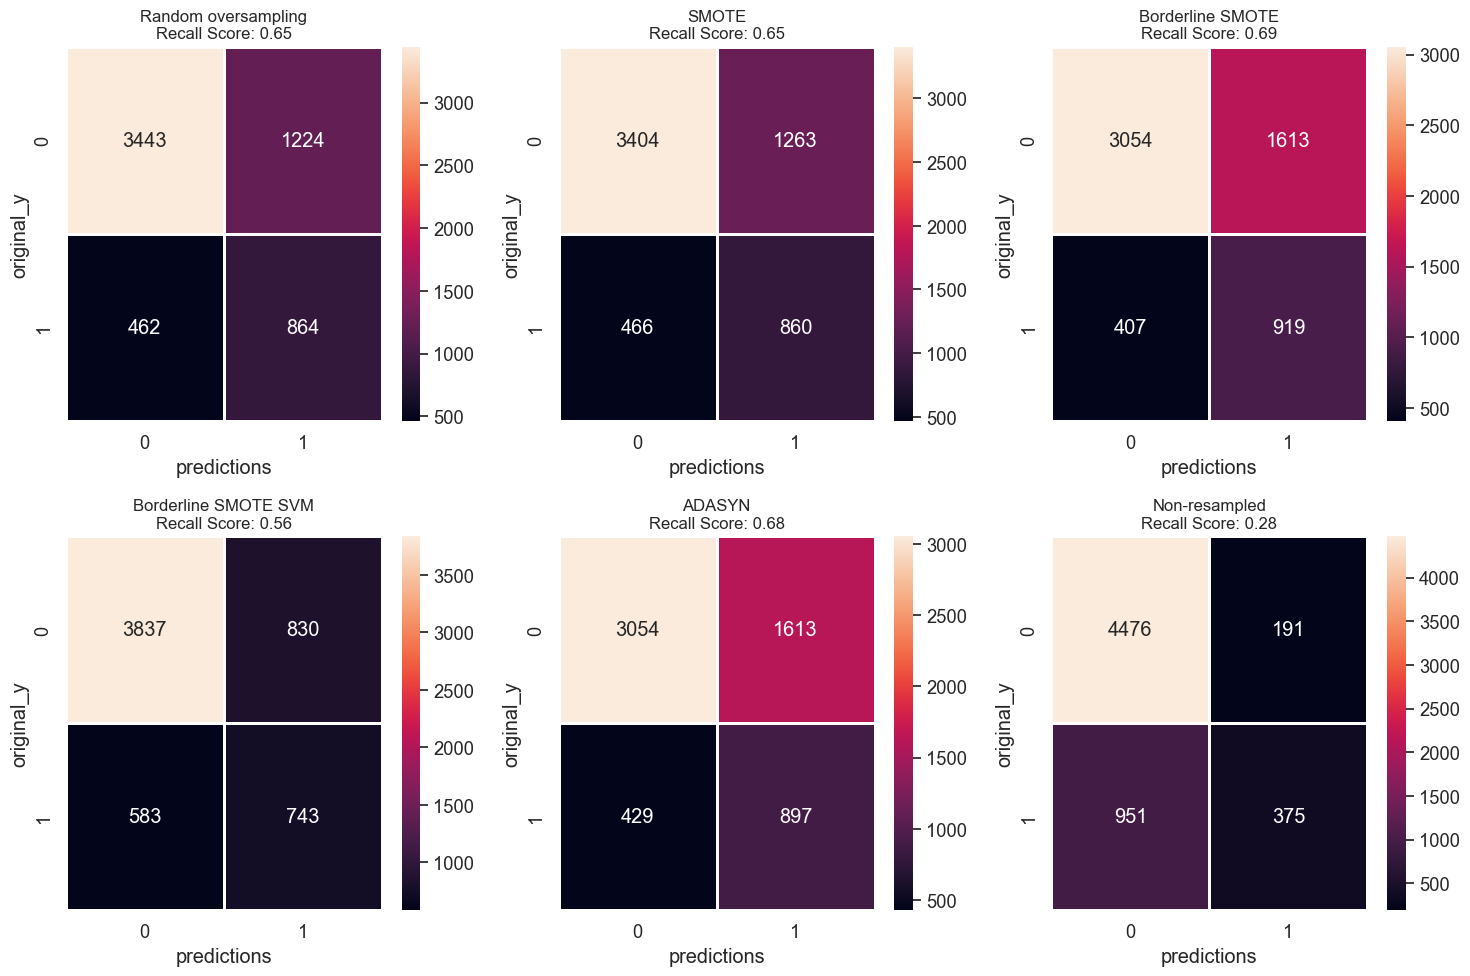

Elapsed time for KNN with all oversampling methods: 33.90 seconds


In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to search
knn_params = {
    'n_neighbors': [3,33, 55],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create KNN model
knn_model = KNeighborsClassifier()

# Create grid search object
knn_grid = GridSearchCV(estimator=knn_model, param_grid=knn_params, cv=3, n_jobs=-1)

# start calculting the time
start_time = time.time()

# Fit grid search object to the data
knn_grid.fit(X_train, y_train)

# Print best hyperparameters
print("Best hyperparameters for K-Nearest Neighbors:", knn_grid.best_params_)

# Fit model with best hyperparameters to training data
classification_model = knn_grid.best_estimator_
classification_model.fit(X_train, y_train)
knn_scores = samplingStrategies()
end_time = time.time()
knn_elapsed_time = end_time - start_time
print("Elapsed time for KNN with all oversampling methods: {:.2f} seconds".format(end_time - start_time))

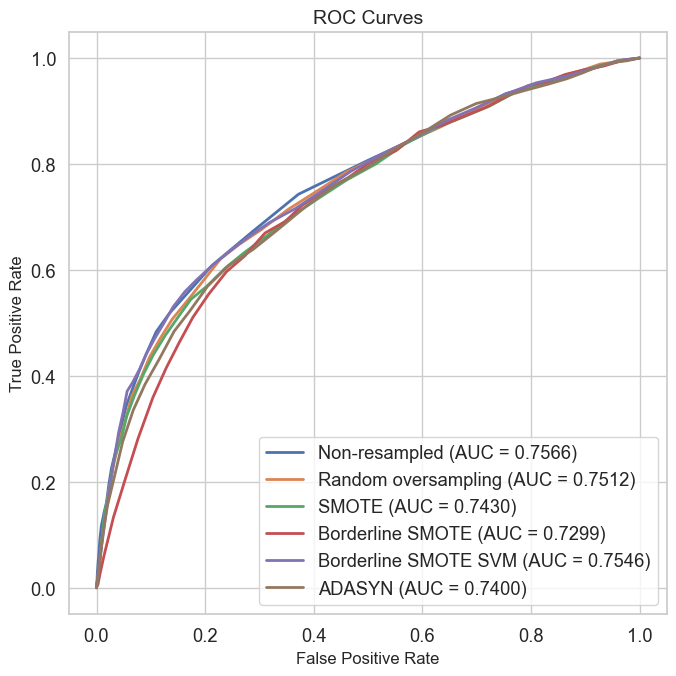

In [45]:
classification_model = knn_grid.best_estimator_
classification_model.fit(X_train, y_train)
plot_ROC_curve(classification_model, X_train, y_train, X_test, y_test, samplers)

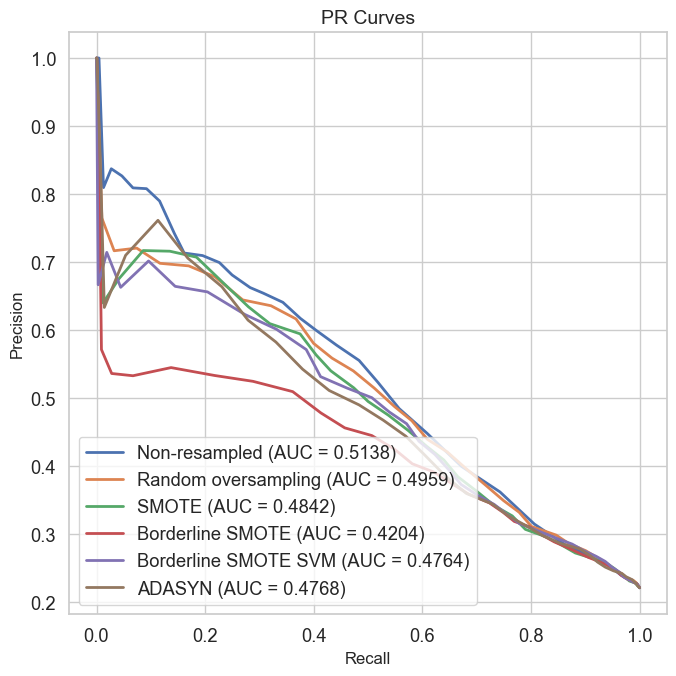

In [46]:
classification_model = knn_grid.best_estimator_
classification_model.fit(X_train, y_train)
plot_PR_curve(classification_model, X_train, y_train, X_test, y_test, samplers)

## SVM

In [47]:
def svmScoring(model, x_train, y_train, x_test, y_test, title):
    y_score = model.decision_function(x_test)
    y_pred = model.predict(x_test)

    cm = confusion_matrix(y_test, y_pred)
    all_scores = {"Accuracy score": accuracy_score(y_test, y_pred),
                  "Precision score": (cm[0, 0]) / (cm[0, 1] + cm[0, 0]),
                  "Recall score": recall_score(y_test, y_pred),
                  "F1 score": f1_score(y_test, y_pred),
                  "ROC AUC score": roc_auc_score(y_test, y_score)}
    print(title)
    print(all_scores)
    return all_scores

def svmSamplingStrategies():
    # Sampling strategies
    samplers = [("Random oversampling", RandomOverSampler(sampling_strategy='minority')),             ("SMOTE", SMOTE(sampling_strategy='minority')),             ("Borderline SMOTE", BorderlineSMOTE(sampling_strategy='minority')),             ("Borderline SMOTE SVM", SVMSMOTE(sampling_strategy='minority')),             ("ADASYN", ADASYN(sampling_strategy='minority'))]

    # Create subplots for each sampling strategy and the non-resampled confusion matrix
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
    axes = axes.flatten()

    # Plot the non-resampled confusion matrix in the last subplot
    cm_non_resampled = svmScoring(classification_model, X_train, y_train, X_test, y_test, "Non-resampled")
    plot_confusion_matrix(axes[-1], y_test, classification_model.predict(X_test), "Non-resampled")

    # get performance metrics and confusion matrix for each sampling strategy
    cm_resampled_list = []  # create empty list to store each sampler_name and cm_resampled value
    for i, (sampler_name, sampler) in enumerate(samplers):
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
        classification_model.fit(X_resampled, y_resampled)
        cm_resampled = svmScoring(classification_model, X_resampled, y_resampled, X_test, y_test, sampler_name)
        plot_confusion_matrix(axes[i], y_test, classification_model.predict(X_test), sampler_name)
        cm_resampled_list.append((sampler_name, cm_resampled))  # append a tuple of sampler_name and cm_resampled to the list
        
    cm_resampled_list.append(("Non-resampled", cm_non_resampled))
    plt.tight_layout()
    plt.show()
    return cm_resampled_list


Best hyperparameters for Linear SVC: {'C': 10, 'dual': False, 'max_iter': 100}
Non-resampled
{'Accuracy score': 0.8017687301852161, 'Precision score': 0.9817870152131991, 'Recall score': 0.16817496229260936, 'F1 score': 0.27294981640146876, 'ROC AUC score': 0.7251358257861995}
Random oversampling
{'Accuracy score': 0.7021525112631404, 'Precision score': 0.7208056567388044, 'Recall score': 0.6365007541478129, 'F1 score': 0.4860351281312986, 'ROC AUC score': 0.7285664146161507}
SMOTE
{'Accuracy score': 0.6829634573669281, 'Precision score': 0.6897364473966145, 'Recall score': 0.6591251885369532, 'F1 score': 0.4791666666666667, 'ROC AUC score': 0.7314981702987602}
Borderline SMOTE
{'Accuracy score': 0.6369097280160186, 'Precision score': 0.619670023569745, 'Recall score': 0.6975867269984917, 'F1 score': 0.4595131644311972, 'ROC AUC score': 0.730469640016017}
Borderline SMOTE SVM
{'Accuracy score': 0.7266811279826464, 'Precision score': 0.7604456824512534, 'Recall score': 0.607843137254901

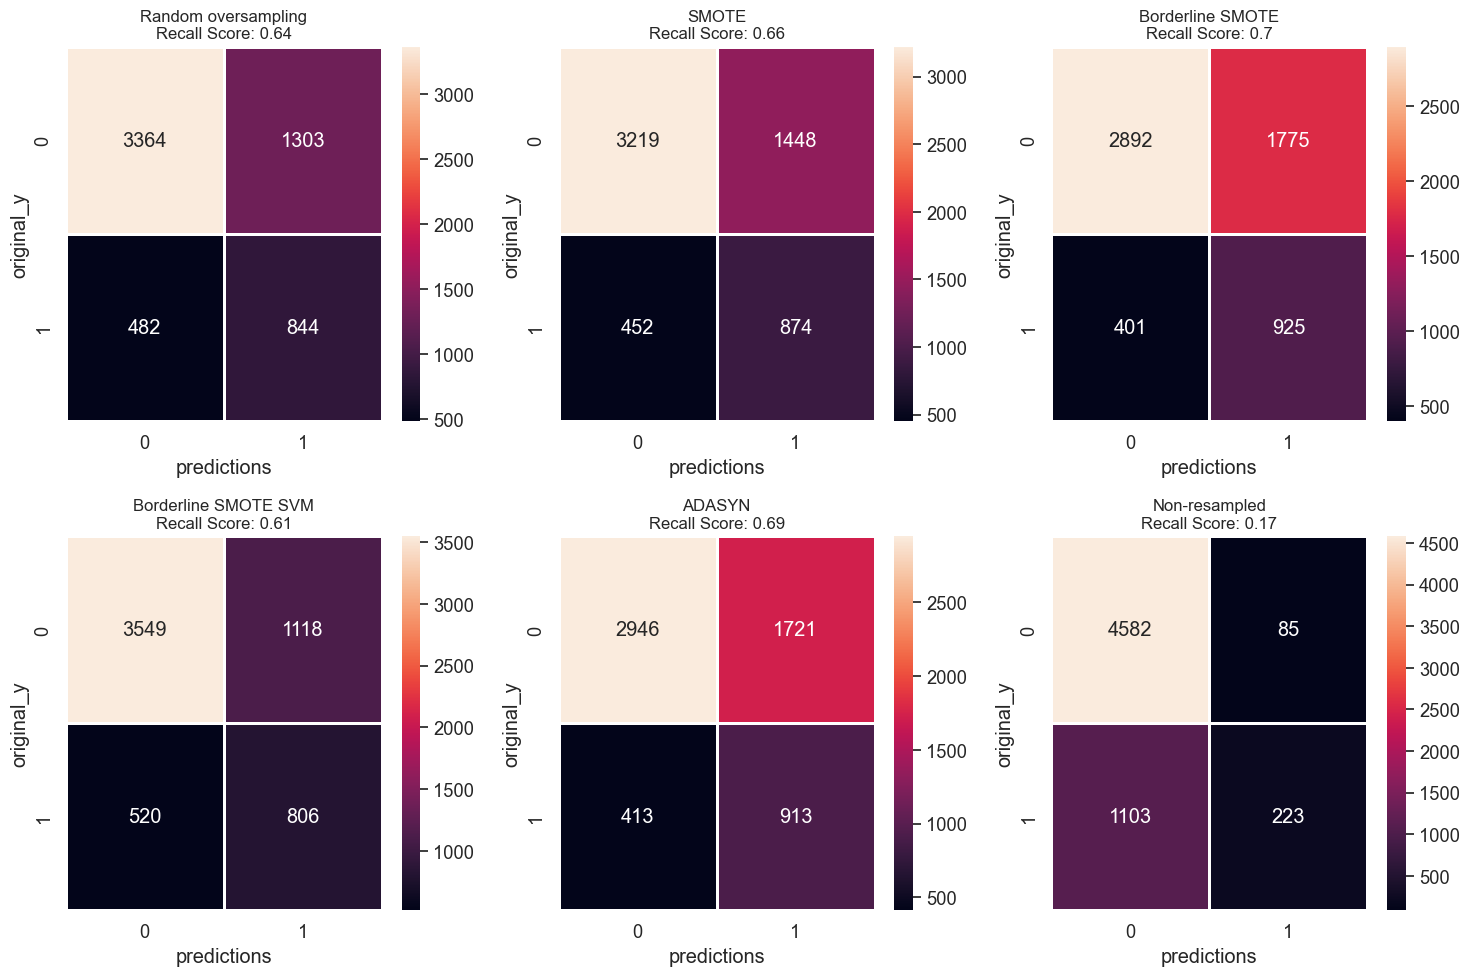

Elapsed time for Linear SVC with all oversampling methods: 18.74 seconds


In [48]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
import time

# Define hyperparameters to search
linear_svc_params = {
    'C': [0.01, 1, 10, 100],
    'dual': [False],
    'max_iter': [100,500]
}

# Create Linear SVC model
linear_svc_model = LinearSVC()

# Create grid search object
linear_svc_grid = GridSearchCV(estimator=linear_svc_model, param_grid=linear_svc_params, cv=3, n_jobs=-1)

# start calculating the time
start_time = time.time()

# Fit grid search object to the data
linear_svc_grid.fit(X_train, y_train)

# Print best hyperparameters
print("Best hyperparameters for Linear SVC:", linear_svc_grid.best_params_)

# Fit model with best hyperparameters to training data
classification_model = linear_svc_grid.best_estimator_
classification_model.fit(X_train, y_train)
linear_svc_scores = svmSamplingStrategies()
end_time = time.time()
linear_svc_elapsed_time = end_time - start_time
print("Elapsed time for Linear SVC with all oversampling methods: {:.2f} seconds".format(linear_svc_elapsed_time))


In [49]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

def plot_ROC_curve_svc(classification_model, X_train, y_train, X_test, y_test, samplers):
    # Create subplots for ROC curves
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
    
    # Plot ROC curve for non-resampled data
    y_scores = classification_model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = roc_auc_score(y_test, y_scores)
    axes.plot(fpr, tpr, label="Non-resampled (AUC = {:.4f})".format(roc_auc), lw=2)
    
    # Plot ROC curve for each sampling strategy
    for sampler_name, sampler in samplers:
        X_resampled, y_resampled = sampler().fit_resample(X_train, y_train)
        classification_model.fit(X_resampled, y_resampled)
        y_scores = classification_model.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_scores)
        roc_auc = roc_auc_score(y_test, y_scores)
        axes.plot(fpr, tpr, label="{} (AUC = {:.4f})".format(sampler_name, roc_auc), lw=2)
    
    axes.set_xlabel("False Positive Rate", fontsize=12)
    axes.set_ylabel("True Positive Rate", fontsize=12)
    axes.set_title("ROC Curves", fontsize=14)
    axes.legend(loc="lower right")
    
    plt.tight_layout()
    plt.show()


In [50]:
def plot_PR_curve_svc(classification_model, X_train, y_train, X_test, y_test, samplers):
    # Create subplots for PR curves
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
    
    # Plot PR curve for non-resampled data
    y_scores = classification_model.decision_function(X_test)
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    pr_auc = average_precision_score(y_test, y_scores)
    axes.plot(recall, precision, label="Non-resampled (AUC = {:.4f})".format(pr_auc), lw=2)
    
    # Plot PR curve for each sampling strategy
    for sampler_name, sampler in samplers:
        X_resampled, y_resampled = sampler().fit_resample(X_train, y_train)
        classification_model.fit(X_resampled, y_resampled)
        y_scores = classification_model.decision_function(X_test)
        precision, recall, _ = precision_recall_curve(y_test, y_scores)
        pr_auc = average_precision_score(y_test, y_scores)
        axes.plot(recall, precision, label="{} (AUC = {:.4f})".format(sampler_name, pr_auc), lw=2)
    
    axes.set_xlabel("Recall", fontsize=12)
    axes.set_ylabel("Precision", fontsize=12)
    axes.set_title("PR Curves", fontsize=14)
    axes.legend(loc="upper right")
    
    plt.tight_layout()
    plt.show()


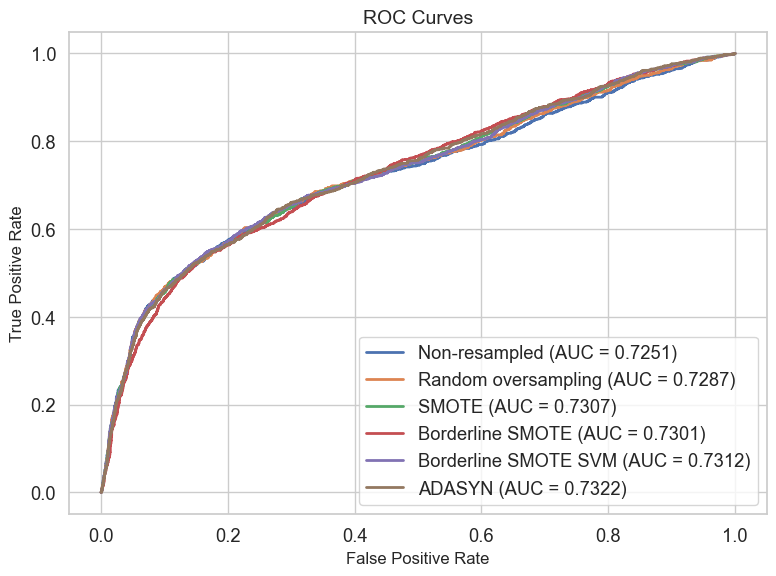

In [51]:
classification_model = linear_svc_grid.best_estimator_
classification_model.fit(X_train, y_train)
plot_ROC_curve_svc(classification_model, X_train, y_train, X_test, y_test, samplers)


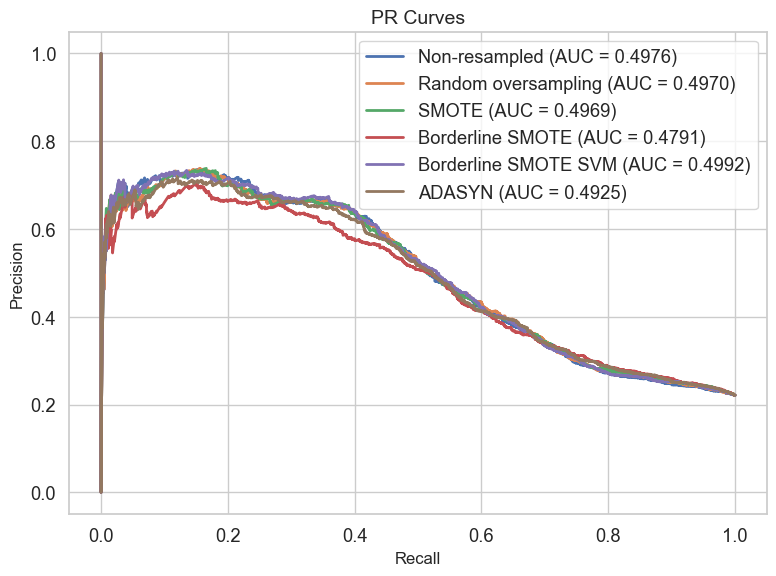

In [52]:
classification_model = linear_svc_grid.best_estimator_
classification_model.fit(X_train, y_train)
plot_PR_curve_svc(classification_model, X_train, y_train, X_test, y_test, samplers)

## Random forest classifier

Best hyperparameters for Random Forest: {'n_estimators': 10, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}
Non-resampled
{'Accuracy score': 0.8072751543467379, 'Precision score': 0.9395757445896722, 'Recall score': 0.3416289592760181, 'F1 score': 0.4395924308588064, 'ROC AUC score': 0.7475974566781106}
Random oversampling
{'Accuracy score': 0.7887535458034374, 'Precision score': 0.8787229483608314, 'Recall score': 0.4720965309200603, 'F1 score': 0.49722001588562353, 'ROC AUC score': 0.7460697700649048}
SMOTE
{'Accuracy score': 0.779743033539129, 'Precision score': 0.8596528819370045, 'Recall score': 0.4984917043740573, 'F1 score': 0.5003785011355034, 'ROC AUC score': 0.7471334465120624}
Borderline SMOTE
{'Accuracy score': 0.7655598197897547, 'Precision score': 0.836297407328048, 'Recall score': 0.5165912518853696, 'F1 score': 0.49369369369369365, 'ROC AUC score': 0.7386164401314581}
Borderline SMOTE SVM
{'Accuracy score': 0.7869180710829301, 'Precision score': 0.874

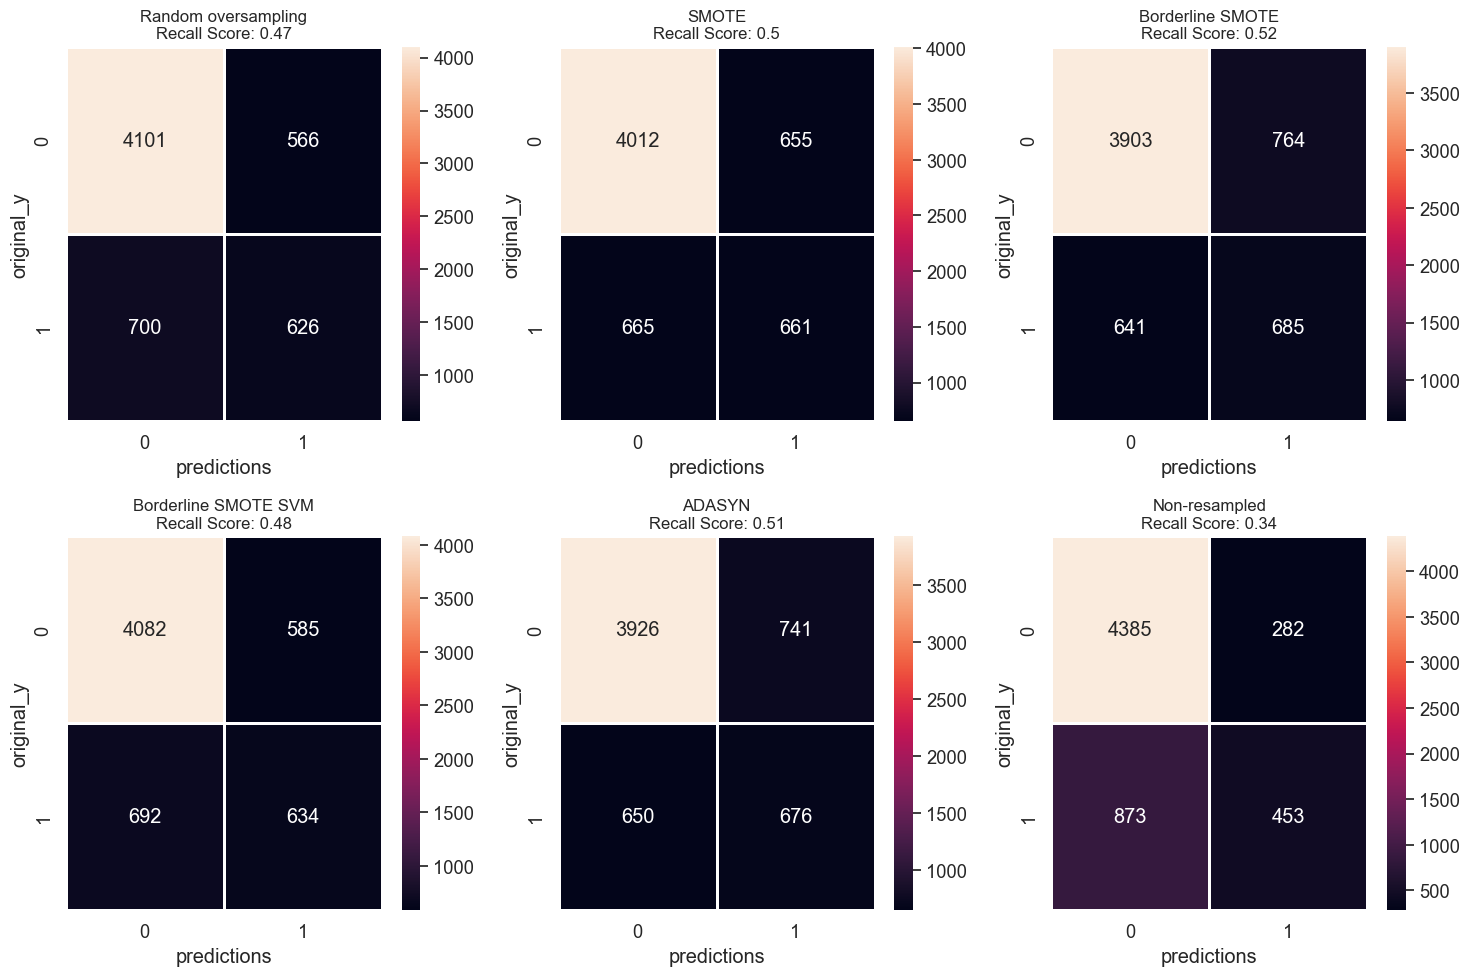

Elapsed time for Random Forest with all oversampling methods: 32.37 seconds


In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

# Define hyperparameters to search
rf_params = {
    'n_estimators': [10, 50],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Create Random Forest Classifier
rf_model = RandomForestClassifier()

# Create HalvingRandomSearchCV object
rf_halving_search = HalvingRandomSearchCV(estimator=rf_model, param_distributions=rf_params, cv=3, n_jobs=-1)

# start calculating the time
start_time = time.time()

# Fit HalvingRandomSearchCV object to the data
rf_halving_search.fit(X_train, y_train)

# Print best hyperparameters
print("Best hyperparameters for Random Forest:", rf_halving_search.best_params_)

# Fit model with best hyperparameters to training data
classification_model = rf_halving_search.best_estimator_
classification_model.fit(X_train, y_train)
randomforest_scores = samplingStrategies()
end_time = time.time()
random_forest_elapsed_time = end_time - start_time
print("Elapsed time for Random Forest with all oversampling methods: {:.2f} seconds".format(end_time - start_time))


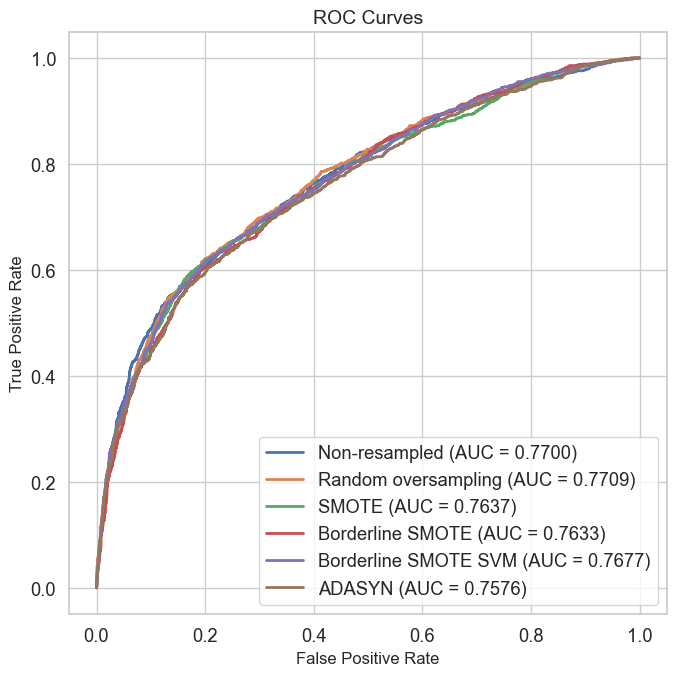

In [54]:
classification_model = rf_halving_search.best_estimator_
classification_model.fit(X_train, y_train)
plot_ROC_curve(classification_model, X_train, y_train, X_test, y_test, samplers)

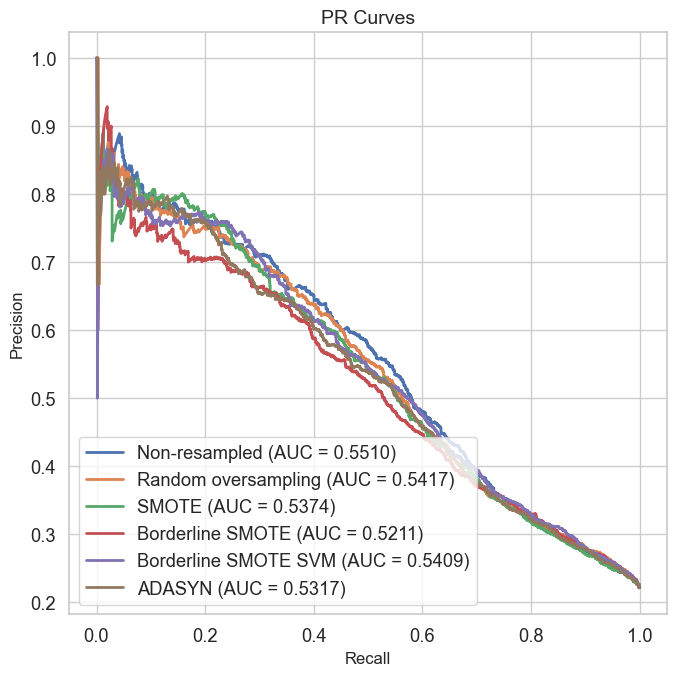

In [55]:
classification_model = rf_halving_search.best_estimator_
classification_model.fit(X_train, y_train)
plot_PR_curve(classification_model, X_train, y_train, X_test, y_test, samplers)

## Gather all the scores

In [64]:
# create separate dataframes for each model
logistic_df = pd.DataFrame([(method, scores['Accuracy score'], scores['Precision score'], scores['Recall score'], scores['F1 score'], scores['ROC AUC score'])
                   for method, scores in logistic_scores],
                  columns=['Method', 'Accuracy score', 'Precision score', 'Recall score', 'F1 score', 'ROC AUC score'])
knn_df = pd.DataFrame([(method, scores['Accuracy score'], scores['Precision score'], scores['Recall score'], scores['F1 score'], scores['ROC AUC score'])
                   for method, scores in knn_scores],
                  columns=['Method', 'Accuracy score', 'Precision score', 'Recall score', 'F1 score', 'ROC AUC score'])
randomforest_df = pd.DataFrame([(method, scores['Accuracy score'], scores['Precision score'], scores['Recall score'], scores['F1 score'], scores['ROC AUC score'])
                   for method, scores in randomforest_scores],
                  columns=['Method', 'Accuracy score', 'Precision score', 'Recall score', 'F1 score', 'ROC AUC score'])
svm_df = pd.DataFrame([(method, scores['Accuracy score'], scores['Precision score'], scores['Recall score'], scores['F1 score'], scores['ROC AUC score'])
                   for method, scores in linear_svc_scores],
                  columns=['Method', 'Accuracy score', 'Precision score', 'Recall score', 'F1 score', 'ROC AUC score'])

# merge all the dataframes into a single dataframe
scores_df = pd.merge(logistic_df, knn_df, on='Method')
scores_df = pd.merge(scores_df, randomforest_df, on='Method')
scores_df = pd.merge(scores_df, svm_df, on='Method')


In [58]:
logistic_df

,Method,Accuracy score,Precision score,Recall score,F1 score,ROC AUC score
0,Random oversampling,0.704322,0.722091,0.641780,0.489925,0.729371
1,SMOTE,0.689638,0.700664,0.650830,0.481316,0.730558
2,Borderline SMOTE,0.635575,0.616456,0.702866,0.460474,0.731021
3,Borderline SMOTE SVM,0.779910,0.853439,0.521116,0.511662,0.727901
4,ADASYN,0.643584,0.630384,0.690045,0.461422,0.732579
5,Non-resampled,0.808443,0.971502,0.234540,0.351412,0.728226


In [59]:
knn_df

,Method,Accuracy score,Precision score,Recall score,F1 score,ROC AUC score
0,Random oversampling,0.718672,0.737733,0.651584,0.506151,0.752418
1,SMOTE,0.711497,0.729376,0.648567,0.498695,0.743879
2,Borderline SMOTE,0.662940,0.654382,0.693062,0.476413,0.726854
3,Borderline SMOTE SVM,0.764225,0.822156,0.560332,0.512591,0.750884
4,ADASYN,0.659269,0.654382,0.676471,0.467675,0.738554
5,Non-resampled,0.809444,0.959074,0.282805,0.396406,0.756640


In [60]:
randomforest_df

,Method,Accuracy score,Precision score,Recall score,F1 score,ROC AUC score
0,Random oversampling,0.806274,0.898864,0.480392,0.523203,0.767492
1,SMOTE,0.792758,0.875723,0.500754,0.516732,0.762139
2,Borderline SMOTE,0.784415,0.861153,0.514329,0.513554,0.763554
3,Borderline SMOTE SVM,0.800434,0.886008,0.499246,0.525397,0.769845
4,ADASYN,0.785416,0.864795,0.506033,0.510654,0.759848
5,Non-resampled,0.820290,0.948361,0.369532,0.476422,0.770603


In [61]:
svm_df

,Method,Accuracy score,Precision score,Recall score,F1 score,ROC AUC score
0,Random oversampling,0.702153,0.720806,0.636501,0.486035,0.728566
1,SMOTE,0.682963,0.689736,0.659125,0.479167,0.731498
2,Borderline SMOTE,0.636910,0.619670,0.697587,0.459513,0.730470
3,Borderline SMOTE SVM,0.726681,0.760446,0.607843,0.496000,0.730507
4,ADASYN,0.643918,0.631241,0.688537,0.461111,0.732497
5,Non-resampled,0.801769,0.981787,0.168175,0.272950,0.725136


In [65]:
scores_df

,Method,Accuracy score_x,Precision score_x,Recall score_x,F1 score_x,ROC AUC score_x,Accuracy score_y,Precision score_y,Recall score_y,F1 score_y,ROC AUC score_y,Accuracy score_x,Precision score_x,Recall score_x,F1 score_x,ROC AUC score_x,Accuracy score_y,Precision score_y,Recall score_y,F1 score_y,ROC AUC score_y
0,Random oversampling,0.704322,0.722091,0.641780,0.489925,0.729371,0.718672,0.737733,0.651584,0.506151,0.752418,0.806274,0.898864,0.480392,0.523203,0.767492,0.702153,0.720806,0.636501,0.486035,0.728566
1,SMOTE,0.689638,0.700664,0.650830,0.481316,0.730558,0.711497,0.729376,0.648567,0.498695,0.743879,0.792758,0.875723,0.500754,0.516732,0.762139,0.682963,0.689736,0.659125,0.479167,0.731498
2,Borderline SMOTE,0.635575,0.616456,0.702866,0.460474,0.731021,0.662940,0.654382,0.693062,0.476413,0.726854,0.784415,0.861153,0.514329,0.513554,0.763554,0.636910,0.619670,0.697587,0.459513,0.730470
3,Borderline SMOTE SVM,0.779910,0.853439,0.521116,0.511662,0.727901,0.764225,0.822156,0.560332,0.512591,0.750884,0.800434,0.886008,0.499246,0.525397,0.769845,0.726681,0.760446,0.607843,0.496000,0.730507
4,ADASYN,0.643584,0.630384,0.690045,0.461422,0.732579,0.659269,0.654382,0.676471,0.467675,0.738554,0.785416,0.864795,0.506033,0.510654,0.759848,0.643918,0.631241,0.688537,0.461111,0.732497
5,Non-resampled,0.808443,0.971502,0.234540,0.351412,0.728226,0.809444,0.959074,0.282805,0.396406,0.756640,0.820290,0.948361,0.369532,0.476422,0.770603,0.801769,0.981787,0.168175,0.272950,0.725136


In [66]:
# export the dataframe to a csv file
scores_df.to_csv('default_of_credit_card_clients_combined_scores.csv', index=False)

In [67]:
log_reg_elapsed_time


21.095763444900513

In [78]:
import pandas as pd

# Create a dictionary with the elapsed time values
data = {
    'log_reg_elapsed_time': [log_reg_elapsed_time],
    'knn_elapsed_time': [knn_elapsed_time],
    'linear_svc_elapsed_time': [linear_svc_elapsed_time],
    'random_forest_elapsed_time': [random_forest_elapsed_time]
}

# Create a dataframe from the dictionary
computational_times = pd.DataFrame(data)


In [79]:
computational_times.head()

,log_reg_elapsed_time,knn_elapsed_time,linear_svc_elapsed_time,random_forest_elapsed_time
0,21.095763,33.901459,18.739743,32.369746


In [80]:
computational_times.to_csv('docc_computational_times.csv', index=False)